<a href="https://colab.research.google.com/github/Azizkarimi/DeepLearning/blob/main/Tree_based_Binary(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. BotNetIoT Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azizullahkarimy","key":"15ee6bf3e1b2635d1e88d3ac0b5ae378"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          14242        379  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1226         34  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59            720         30  1.0              
utkarshx27/monthly-transportation-statistics              Monthly Transportation Statistics         

In [ ]:
!kaggle datasets download -d mkashifn/nbaiot-dataset

100% 1.75G/1.75G [00:18<00:00, 111MB/s]
100% 1.75G/1.75G [00:18<00:00, 100MB/s]


In [ ]:
!unzip /content/nbaiot-dataset.zip

Archive:  /content/nbaiot-dataset.zip
  inflating: 1.benign.csv            
  inflating: 1.gafgyt.combo.csv      
  inflating: 1.gafgyt.junk.csv       
  inflating: 1.gafgyt.scan.csv       
  inflating: 1.gafgyt.tcp.csv        
  inflating: 1.gafgyt.udp.csv        
  inflating: 1.mirai.ack.csv         
  inflating: 1.mirai.scan.csv        
  inflating: 1.mirai.syn.csv         
  inflating: 1.mirai.udp.csv         
  inflating: 1.mirai.udpplain.csv    
  inflating: 2.benign.csv            
  inflating: 2.gafgyt.combo.csv      
  inflating: 2.gafgyt.junk.csv       
  inflating: 2.gafgyt.scan.csv       
  inflating: 2.gafgyt.tcp.csv        
  inflating: 2.gafgyt.udp.csv        
  inflating: 2.mirai.ack.csv         
  inflating: 2.mirai.scan.csv        
  inflating: 2.mirai.syn.csv         
  inflating: 2.mirai.udp.csv         
  inflating: 2.mirai.udpplain.csv    
  inflating: 3.benign.csv            
  inflating: 3.gafgyt.combo.csv      
  inflating: 3.gafgyt.junk.csv       
  inflating:

In [ ]:
benign=pd.read_csv('/content/6.benign.csv')
g_c=pd.read_csv('/content/5.gafgyt.combo.csv')
g_j=pd.read_csv('/content/5.gafgyt.junk.csv')
g_s=pd.read_csv('/content/5.gafgyt.scan.csv')
g_t=pd.read_csv('/content/5.gafgyt.tcp.csv')
g_u=pd.read_csv('/content/5.gafgyt.udp.csv')
m_a=pd.read_csv('/content/5.mirai.ack.csv')
m_sc=pd.read_csv('/content/5.mirai.scan.csv')
m_sy=pd.read_csv('/content/5.mirai.syn.csv')
m_u=pd.read_csv('/content/5.mirai.udp.csv')
m_u_p=pd.read_csv('/content/5.mirai.udpplain.csv')

In [ ]:
benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.25,replace=False)
g_j=g_j.sample(frac=0.5,replace=False)
g_s=g_s.sample(frac=0.5,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.27,replace=False)

In [ ]:
benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [ ]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,3.002944,69.990195,1.999019e+02,3.035630,69.882629,198.812509,3.504922,68.565954,1.836031e+02,7.577274,...,0.0,0.0,2.000000,75.000000,15.000000,75.000000,225.000000,0.0,0.0,benign
1,1.000000,73.000000,0.000000e+00,1.000000,73.000000,0.000000,1.000000,73.000000,4.610000e-10,1.432300,...,0.0,0.0,1.000000,73.000000,0.000000,73.000000,0.000000,0.0,0.0,benign
2,2.001011,74.000000,8.640000e-09,2.019340,74.000005,0.003581,2.590510,75.689429,1.169568e+03,36.638987,...,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,benign
3,1.442463,85.057685,5.568429e+01,1.655247,83.379537,70.697780,2.601291,78.405164,1.033959e+02,7.714625,...,0.0,0.0,5.743188,85.747374,10.463936,85.747374,109.493962,0.0,0.0,benign
4,1.000000,73.000002,1.418448e-03,1.000091,73.008882,6.426879,1.432825,101.309593,1.955061e+04,33.157406,...,0.0,0.0,1.000000,73.000000,0.000000,73.000000,0.000000,0.0,0.0,benign


In [ ]:
#Listing the instances of each class
data.groupby('type')['type'].count()

type
benign            24628
gafgyt_combo      15345
gafgyt_junk       15449
gafgyt_scan       14648
gafgyt_tcp        15676
gafgyt_udp        15602
mirai_ack         15138
mirai_scan        14517
mirai_syn         16436
mirai_udp         15625
mirai_udpplain    15304
Name: type, dtype: int64

In [ ]:
#shuffle rows of dataframe 
sampler=np.random.permutation(len(data))
data=data.take(sampler)
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
170884,57.376259,523.355125,14197.912513,83.903522,469.521578,34590.111824,224.640912,350.133978,59137.292422,535.075597,...,0.0,0.0,285.145596,554.0,0.000011,554.0,1.164153e-10,0.0,0.0,mirai_udpplain
89245,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,gafgyt_tcp
59602,180.344305,74.004434,0.441054,281.282582,74.030724,16.209463,651.379094,74.781172,622.979194,6577.328407,...,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0,gafgyt_junk
160296,131.911155,66.461474,49.229509,196.464020,66.735950,49.429335,461.827432,67.483247,49.083480,3844.088236,...,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0,mirai_syn
111183,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,gafgyt_udp


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178368 entries, 170884 to 53770
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 159.2+ MB


In [ ]:
data['type'].value_counts()

benign            24628
mirai_syn         16436
gafgyt_tcp        15676
mirai_udp         15625
gafgyt_udp        15602
gafgyt_junk       15449
gafgyt_combo      15345
mirai_udpplain    15304
mirai_ack         15138
gafgyt_scan       14648
mirai_scan        14517
Name: type, dtype: int64

In [ ]:
# Create a new column 'class' based on the 'type' column
data['class'] = data['type'].apply(lambda x: 'benign' if x == 'benign' else 'attack')

# Drop the original 'type' column
data.drop('type', axis=1, inplace=True)


In [ ]:
# labels = data['class']
# labels.shape

In [ ]:
data['class'].value_counts()

attack    153740
benign     24628
Name: class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate the features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Apply SMOTE to generate synthetic samples for the benign class
smote = SMOTE(sampling_strategy='minority')
X_synthetic, y_synthetic = smote.fit_resample(X, y)

# Combine the synthetic samples with the original benign samples
synthetic_data = pd.concat([X_synthetic, y_synthetic], axis=1)


In [ ]:
synthetic_data['class'].value_counts()

attack    153740
benign    153740
Name: class, dtype: int64

In [ ]:
labels = synthetic_data['class']
labels.shape

(307480,)

In [ ]:
#drop labels from training dataset
data=synthetic_data.drop('class', axis=1)
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,57.376259,523.355125,14197.912513,83.903522,469.521578,34590.111824,224.640912,350.133978,59137.292422,535.075597,...,5.820766e-11,0.0,0.0,285.145596,554.0,0.000011,554.0,1.164153e-10,0.0,0.0
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
2,180.344305,74.004434,0.441054,281.282582,74.030724,16.209463,651.379094,74.781172,622.979194,6577.328407,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0
3,131.911155,66.461474,49.229509,196.464020,66.735950,49.429335,461.827432,67.483247,49.083480,3844.088236,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0
4,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0


In [ ]:
import pandas as pd

# Define the standardize function
def standardize(df, col):
    df[col] = (df[col] - df[col].mean()) / df[col].std()

# Create a copy of the original DataFrame
data_st = data.copy()

# Iterate over the numerical columns and standardize them
for col in data_st.select_dtypes(include=[float, int]).columns:
    standardize(data_st, col)

# Print the head of the standardized DataFrame
print(data_st.head())


   MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          0.206910        3.925666            0.035154          0.168316   
1         -0.744895       -0.603407           -0.580718         -0.722208   
2          2.282988       -0.466520           -0.580699          2.288500   
3          1.465288       -0.540249           -0.578582          1.377406   
4         -0.744895       -0.603407           -0.580718         -0.722208   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0        3.548507            0.854701          0.178389        2.433398   
1       -0.630799           -0.598663         -0.689159       -0.671134   
2       -0.487611           -0.597981          1.833791       -0.512970   
3       -0.562057           -0.596586          1.098483       -0.591061   
4       -0.630799           -0.598663         -0.689159       -0.671134   

   MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_radius  \
0            1.783

In [ ]:
#training data for the neural net
train_data_st=data_st.values
train_data_st

array([[ 0.20690978,  3.92566599,  0.03515375, ..., -0.25815426,
        -0.26274658, -0.26421173],
       [-0.74489474, -0.60340683, -0.58071791, ..., -0.25815426,
        -0.26274658, -0.26421173],
       [ 2.2829883 , -0.46652024, -0.58069878, ..., -0.25815426,
        -0.26274658, -0.26421173],
       ...,
       [-0.74489474, -0.60340683, -0.58071791, ..., -0.25815426,
        -0.26274658, -0.26421173],
       [-0.74433715, -0.60330099, -0.58071134, ..., -0.25815426,
        -0.26274658, -0.26421173],
       [-0.74462312, -0.53148916, -0.58067582, ..., -0.25815426,
        -0.26274658, -0.26421173]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
labels_encoded = label_enc.fit_transform(labels)


In [ ]:
labels

0         attack
1         attack
2         attack
3         attack
4         attack
           ...  
307475    benign
307476    benign
307477    benign
307478    benign
307479    benign
Name: class, Length: 307480, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# test/train split  25% test
x_train, x_test, y_train, y_test = train_test_split(
    train_data_st, labels_encoded, test_size=0.22, random_state=42)

In [ ]:
!pip install catboost
!pip install joblib
# !pip install xgboost
# !pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
import xgboost as xgb
import lightgbm  as lgb
import catboost as cb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
import time
import joblib

botnet_models = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Extreme Gradient Boosting ': xgb.XGBClassifier(),
    'Light GMB':lgb.LGBMClassifier(),
    'Adaptive Boosting':AdaBoostClassifier(),
    'Cat Boost':cb.CatBoostClassifier() ,
    'Extra Tree':ExtraTreesClassifier()
}

train_score = {}
accuracy = {}
precision = {}
recall = {}
training_time = {}
y_pred = {}

for key, model in botnet_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time[key] = time.time() - start_time

    y_pred[key] = model.predict(x_test)

    train_score[key] = model.score(x_train, y_train)
    accuracy[key] = model.score(x_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key], average='weighted')
    recall[key] = recall_score(y_test, y_pred[key], average='weighted')
joblib.dump(botnet_models,'botnet_models.pkl')

Learning rate set to 0.106944
0:	learn: 0.3035607	total: 172ms	remaining: 2m 52s
1:	learn: 0.1370511	total: 303ms	remaining: 2m 31s
2:	learn: 0.0611992	total: 417ms	remaining: 2m 18s
3:	learn: 0.0295286	total: 538ms	remaining: 2m 13s
4:	learn: 0.0157390	total: 659ms	remaining: 2m 11s
5:	learn: 0.0088541	total: 773ms	remaining: 2m 8s
6:	learn: 0.0056946	total: 902ms	remaining: 2m 7s
7:	learn: 0.0038832	total: 1.02s	remaining: 2m 6s
8:	learn: 0.0025785	total: 1.13s	remaining: 2m 4s
9:	learn: 0.0017788	total: 1.24s	remaining: 2m 3s
10:	learn: 0.0014501	total: 1.35s	remaining: 2m 1s
11:	learn: 0.0011073	total: 1.45s	remaining: 1m 59s
12:	learn: 0.0009553	total: 1.55s	remaining: 1m 57s
13:	learn: 0.0008517	total: 1.64s	remaining: 1m 55s
14:	learn: 0.0007841	total: 1.74s	remaining: 1m 54s
15:	learn: 0.0007701	total: 1.82s	remaining: 1m 52s
16:	learn: 0.0007197	total: 1.9s	remaining: 1m 49s
17:	learn: 0.0006886	total: 1.99s	remaining: 1m 48s
18:	learn: 0.0006633	total: 2.09s	remaining: 1m 47s

['botnet_models.pkl']

In [ ]:
data = {
    'Training score': train_score.values(),
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'Training time': training_time.values()
}

df_models = pd.DataFrame(data=data, index=botnet_models.keys())
print(df_models)

                            Training score  Accuracy  Precision    Recall  \
Decision Tree Classifier          1.000000  0.999956   0.999956  0.999956   
Random Forest Classifier          1.000000  0.999956   0.999956  0.999956   
Extreme Gradient Boosting         1.000000  0.999970   0.999970  0.999970   
Light GMB                         1.000000  1.000000   1.000000  1.000000   
Adaptive Boosting                 1.000000  0.999970   0.999970  0.999970   
Cat Boost                         0.999987  0.999911   0.999911  0.999911   
Extra Tree                        1.000000  0.999970   0.999970  0.999970   

                            Training time  
Decision Tree Classifier        18.656278  
Random Forest Classifier       100.574234  
Extreme Gradient Boosting       80.574728  
Light GMB                       10.042382  
Adaptive Boosting              139.509936  
Cat Boost                      111.035104  
Extra Tree                      34.971731  


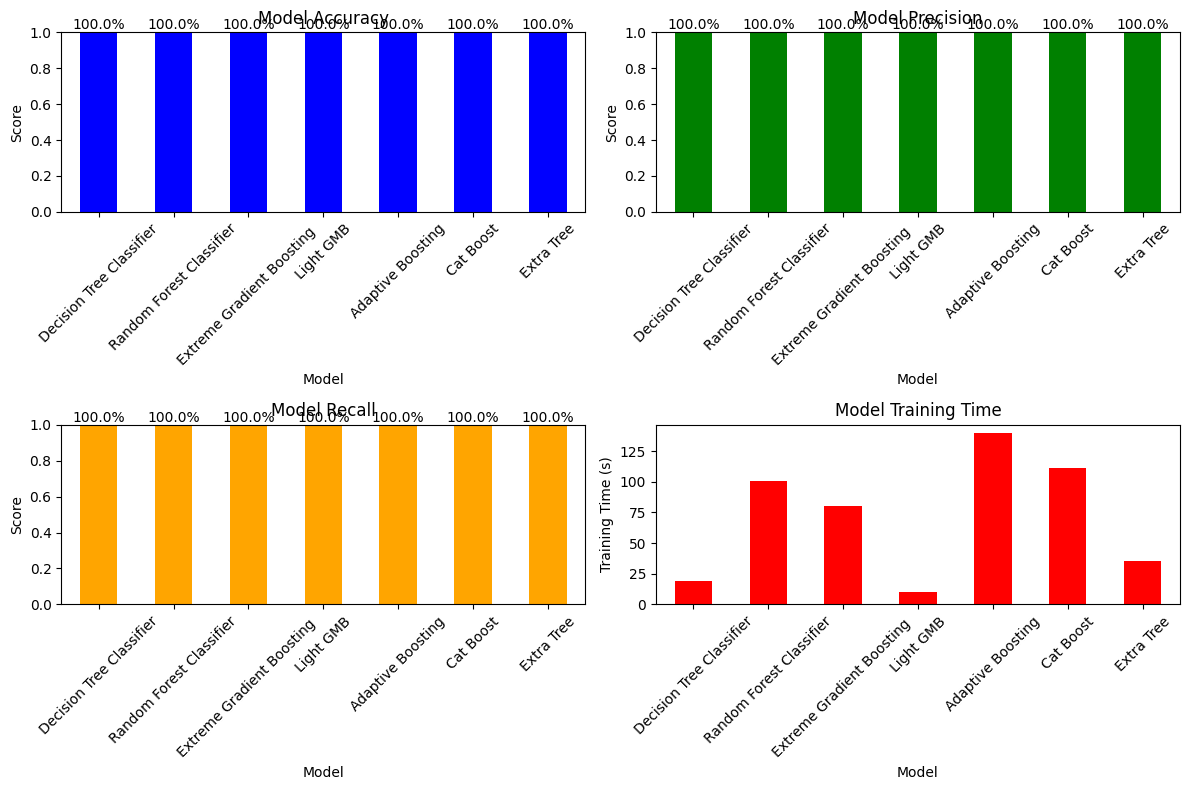

In [ ]:
import matplotlib.pyplot as plt

# Create a dataframe from the metrics dictionary
df_models = pd.DataFrame(data=data, index=botnet_models.keys())

# Plotting the metrics
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
ax = df_models['Accuracy'].plot(kind='bar', color='blue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Precision plot
plt.subplot(2, 2, 2)
ax = df_models['Precision'].plot(kind='bar', color='green')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Precision')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Recall plot
plt.subplot(2, 2, 3)
ax = df_models['Recall'].plot(kind='bar', color='orange')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Recall')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Training time plot
plt.subplot(2, 2, 4)
df_models['Training time'].plot(kind='bar', color='red')
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Model Training Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

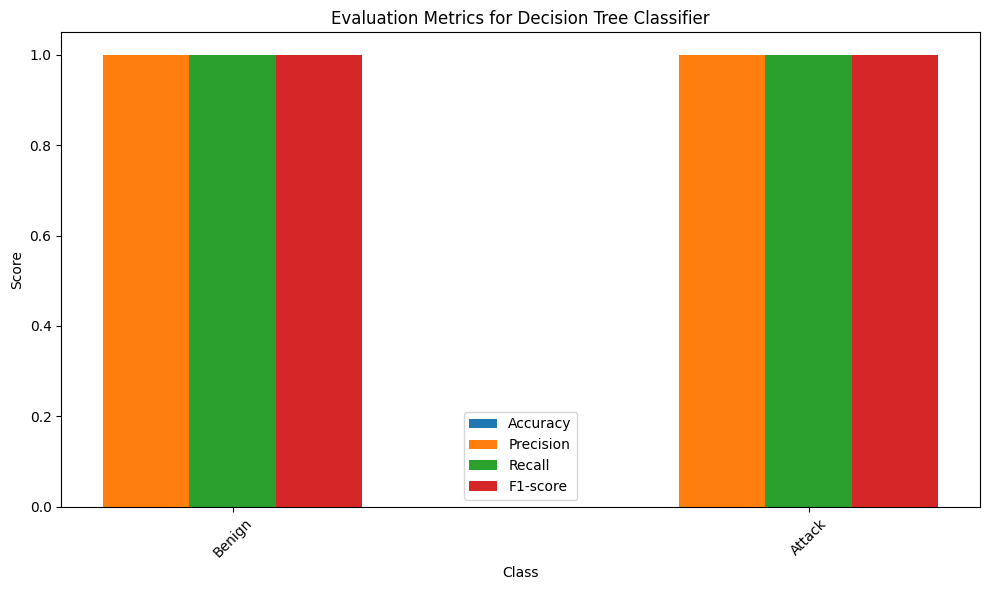

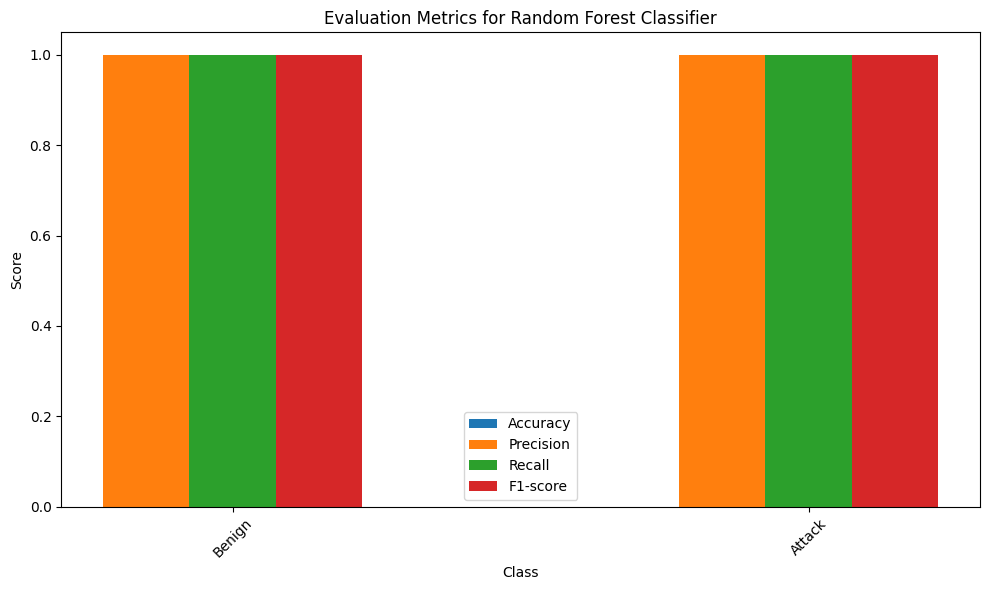

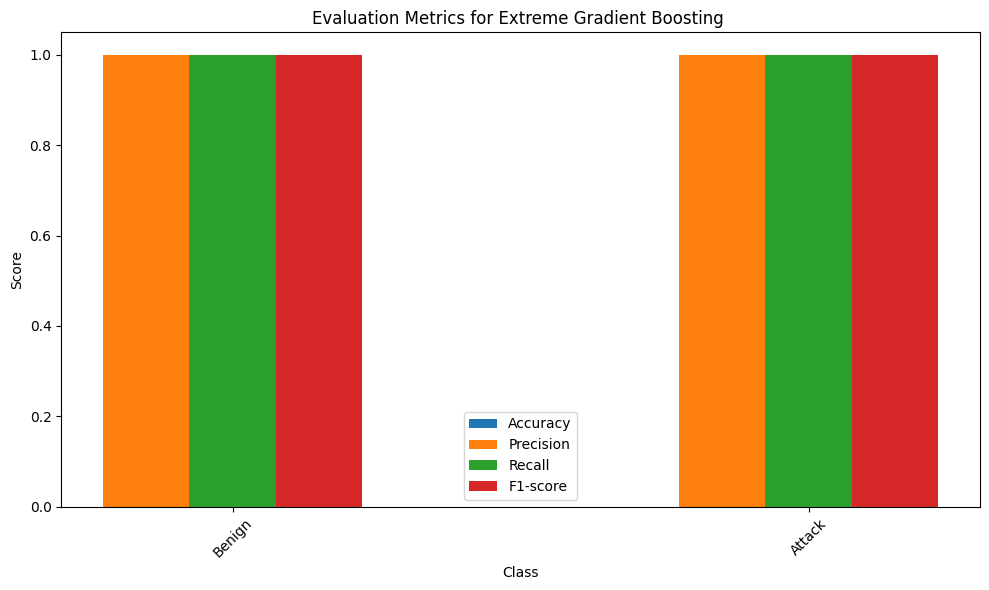

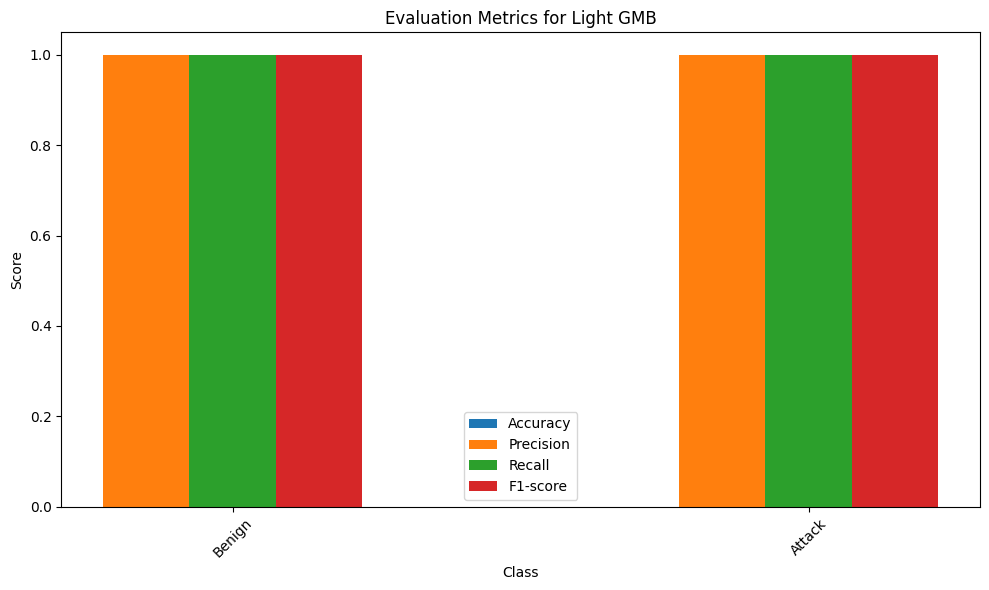

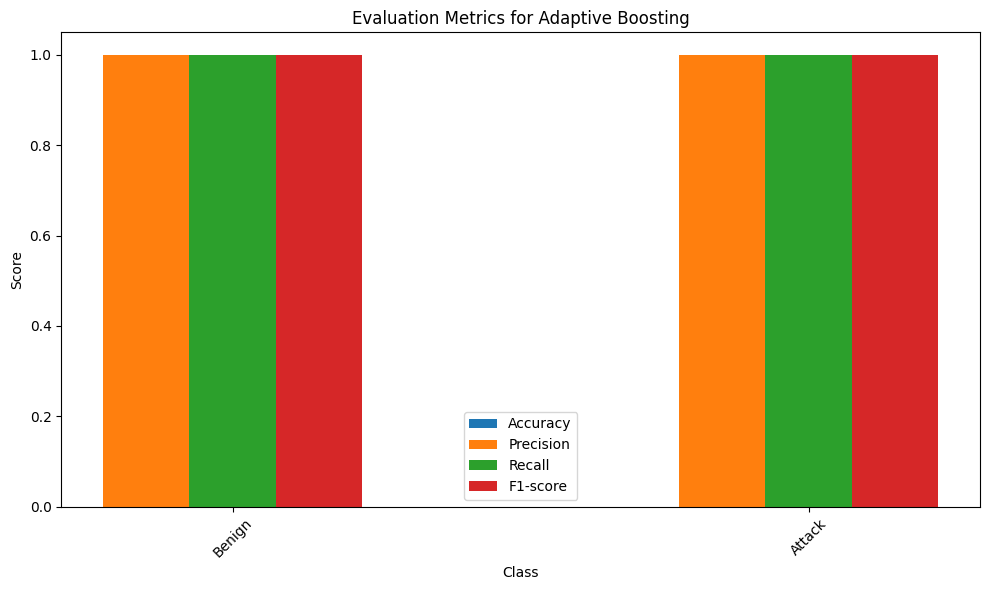

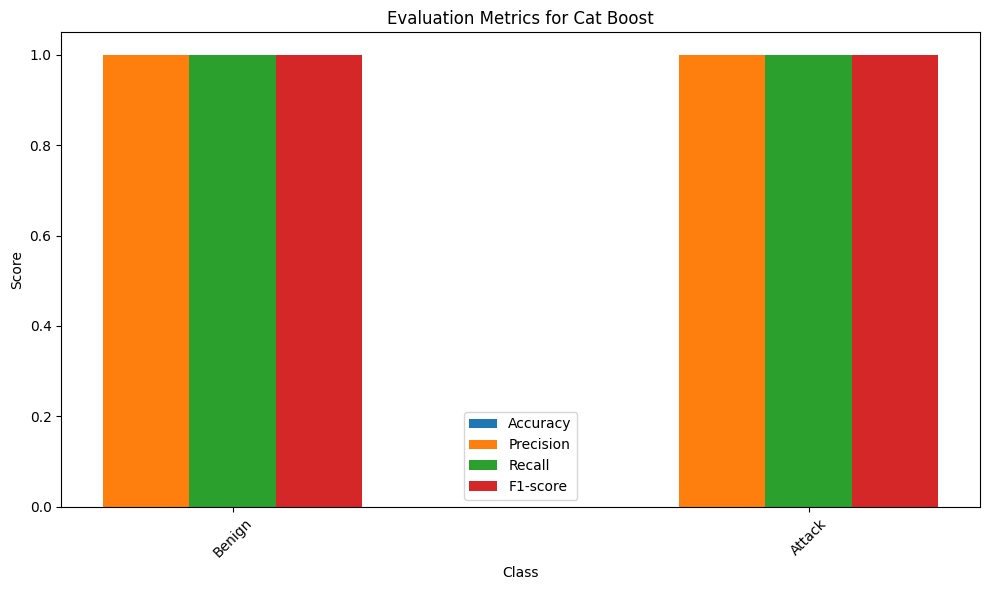

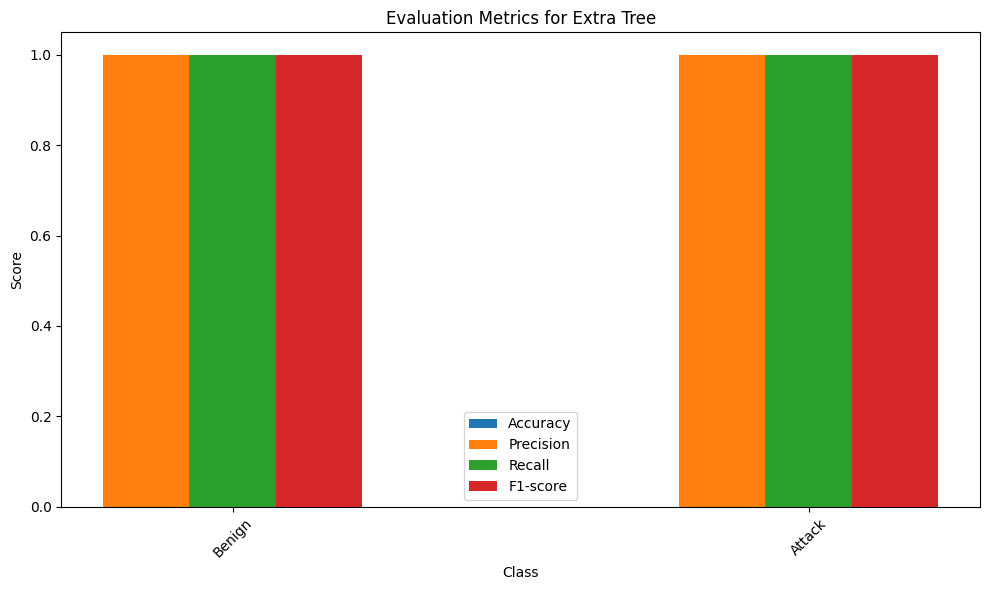

In [ ]:
from sklearn.metrics import classification_report
import  matplotlib.pyplot as plt 
class_names = ['Benign', 'Attack']
for key, model in botnet_models.items():
    report = classification_report(y_test, y_pred[key], target_names=class_names, digits=4, zero_division=1, output_dict=True)
    accuracy = report['accuracy']
    precision = [report[label]['precision'] for label in class_names]
    recall = [report[label]['recall'] for label in class_names]
    f1_score = [report[label]['f1-score'] for label in class_names]

    # Plot bar plots for precision, recall, and F1-score
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(class_names))
    bar_width = 0.15

    accuracy_bar = ax.bar(index, accuracy, bar_width, label='Accuracy')
    precision_bar = ax.bar(index, precision, bar_width, label='Precision')
    recall_bar = ax.bar(index + bar_width, recall, bar_width, label='Recall')
    f1_score_bar = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-score')

    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.set_title(f'Evaluation Metrics for {key}')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_names, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['Benign', 'Attack']
for key, model in botnet_models.items():
    # Get the predicted labels and true labels
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {key}')
    plt.show()

### 2. CICID2017 DATASET 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import tensorflow as tf

# Check if GPU is available
if tf.test.is_gpu_available():
    # Set GPU device configuration
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azizkarimy","key":"b60aa22eb988fe084b8c20ba2d6fa0e1"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                   25KB  2023-04-13 09:55:16          17745        487  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)             22KB  2023-05-12 13:06:39            778         31  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset                             3MB  2023-04-28 23:18:15           1727         43  1.0              
iammustafatz/diabetes-prediction-dataset                  Diabetes prediction dataset                   734KB  2023-04-0

In [7]:
!kaggle datasets download -d cicdataset/cicids2017

100% 230M/230M [00:02<00:00, 72.8MB/s]
100% 230M/230M [00:02<00:00, 103MB/s] 


In [8]:
!unzip /content/cicids2017.zip

Archive:  /content/cicids2017.zip
  inflating: MachineLearningCSV.md5  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  


In [9]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
file_paths = [
    "/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "/content/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv",
    "/content/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "/content/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "/content/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv",
    "/content/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv"
]

dataframes = {}

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, low_memory=False)
    dataframes[f"df{i}"] = df

In [10]:
print(dataframes.keys())

dict_keys(['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8'])


In [11]:
df = pd.DataFrame()  # Initialize an empty dataframe

for key in dataframes:
    df = pd.concat([df, dataframes[key]])

In [12]:
df.shape

(2830743, 79)

In [13]:
df.columns = df.columns.str.strip()
print("Original length of df:", len(df))

df = df.replace([np.inf, -np.inf], np.nan).dropna()
print("After dropping null values, the length of df:", len(df))


Original length of df: 2830743
After dropping null values, the length of df: 2827876


In [14]:
df['Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [15]:
# Create a new column 'class' based on the 'type' column
df['type'] = df['Label'].apply(lambda x: 'BENIGN' if x == 'BENIGN' else 'ATTACK')

# Drop the original 'type' column
df.drop('Label', axis=1, inplace=True)

In [16]:
df['type'].value_counts()

BENIGN    2271320
ATTACK     556556
Name: type, dtype: int64

In [17]:
df.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Fl

In [18]:
# data split
from sklearn.model_selection import train_test_split
from collections import Counter
y = df.type
X = df.drop(columns='type')
Classes = y.unique()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [19]:
type(X_train)

pandas.core.frame.DataFrame

In [20]:
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Maximum value in X_train:", np.max(X_train))
# Handle missing values
# For example, using mean imputation
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))


Missing values in X_train: Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min     

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Maximum value in X_train: Destination Port               6.553500e+04
Flow Duration                  1.200000e+08
Total Fwd Packets              2.186580e+05
Total Backward Packets         2.912600e+05
Total Length of Fwd Packets    1.290000e+07
Total Length of Bwd Packets    6.410014e+08
Fwd Packet Length Max          2.482000e+04
Fwd Packet Length Min          2.325000e+03
Fwd Packet Length Mean         5.940857e+03
Fwd Packet Length Std          7.125597e+03
Bwd Packet Length Max          1.953000e+04
Bwd Packet Length Min          2.042000e+03
Bwd Packet Length Mean         5.800500e+03
Bwd Packet Length Std          8.194660e+03
Flow Bytes/s                   2.071000e+09
Flow Packets/s                 4.000000e+06
Flow IAT Mean                  1.200000e+08
Flow IAT Std                   8.480026e+07
Flow IAT Max                   1.200000e+08
Flow IAT Min                   1.200000e+08
Fwd IAT Total                  1.200000e+08
Fwd IAT Mean                   1.200000e+08
Fwd IA

In [21]:
type(X_train)

numpy.ndarray

In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_test = le.transform(y_test)

print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)


instances per label in training set
 BENIGN    1703490
ATTACK     417417
Name: type, dtype: int64
instances per label in test set
 BENIGN    567830
ATTACK    139139
Name: type, dtype: int64
(2120907, 78)
(706969, 78)
{'ATTACK': 0, 'BENIGN': 1}


In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Define the desired number of instances of oversampling for each class
desired_counts = {
    0: 700000,    # Attacks
}
# Define the desired number of instances of undersamping for each class

undersampling_counts = {
    1: 1000000,  # BENIGN
}

# Create the oversampler and undersampler with the desired counts
over = SMOTE(sampling_strategy=desired_counts, k_neighbors=5, n_jobs=None)
under = RandomUnderSampler(sampling_strategy=undersampling_counts)

# Define the steps in the pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline to perform resampling
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Check the class distribution after resampling
counter = Counter(y_train_resampled)
print(counter)


Counter({1: 1000000, 0: 700000})


In [24]:
### transform ndarray into dataframe type for later operation.
X_train = pd.DataFrame(X_train_resampled)
y_train = pd.DataFrame(y_train_resampled )
X_test = pd.DataFrame(X_test)
from sklearn.feature_selection import f_classif
### Compute the ANOVA F-value 
f_value = f_classif(X_train, y_train)
### Now we select the top 10 important features based on the result above.
from sklearn.feature_selection import SelectKBest
sel_top_cols = SelectKBest(f_classif, k=10)
sel_top_cols.fit(X_train, y_train)
X_train.columns[sel_top_cols.get_support()]
### transform ndarray back:
X_train = X_train.values
X_test = X_test.values

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [31 33 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection

In [25]:
!pip install catboost
!pip install joblib
# !pip install xgboost
# !pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 14.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
import xgboost as xgb
import lightgbm  as lgb
import catboost as cb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
import time
import joblib
cicid_models = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Extreme Gradient Boosting ': xgb.XGBClassifier(),
    'Light GMB':lgb.LGBMClassifier(),
    'Adaptive Boosting':AdaBoostClassifier(),
    'Cat Boost':cb.CatBoostClassifier() ,
    'Extra Tree':ExtraTreesClassifier()
}

train_score = {}
accuracy = {}
precision = {}
recall = {}
training_time = {}
y_pred = {}

for key, model in cicid_models.items():
    start_time = time.time()
    model.fit(X_train, y_train.values.ravel())
    training_time[key] = time.time() - start_time

    y_pred[key] = model.predict(X_test)

    train_score[key] = model.score(X_train, y_train)
    accuracy[key] = model.score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key], average='weighted')
    recall[key] = recall_score(y_test, y_pred[key], average='weighted')

joblib.dump(cicid_models, 'cicid_models.pkl')


Learning rate set to 0.246795
0:	learn: 0.2698713	total: 652ms	remaining: 10m 51s
1:	learn: 0.1570234	total: 1.26s	remaining: 10m 31s
2:	learn: 0.1009134	total: 1.83s	remaining: 10m 9s
3:	learn: 0.0759304	total: 2.41s	remaining: 10m
4:	learn: 0.0586990	total: 3s	remaining: 9m 57s
5:	learn: 0.0486975	total: 3.51s	remaining: 9m 42s
6:	learn: 0.0410035	total: 4.08s	remaining: 9m 38s
7:	learn: 0.0344192	total: 4.61s	remaining: 9m 31s
8:	learn: 0.0301179	total: 5.21s	remaining: 9m 34s
9:	learn: 0.0267118	total: 6.01s	remaining: 9m 54s
10:	learn: 0.0244456	total: 6.92s	remaining: 10m 22s
11:	learn: 0.0217065	total: 7.95s	remaining: 10m 54s
12:	learn: 0.0197729	total: 8.54s	remaining: 10m 48s
13:	learn: 0.0187753	total: 8.97s	remaining: 10m 31s
14:	learn: 0.0179992	total: 9.45s	remaining: 10m 20s
15:	learn: 0.0170775	total: 9.95s	remaining: 10m 11s
16:	learn: 0.0146743	total: 10.6s	remaining: 10m 12s
17:	learn: 0.0136972	total: 11.2s	remaining: 10m 13s
18:	learn: 0.0133668	total: 11.7s	remain

['cicid_models.pkl']

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import joblib
model_path = 'https://drive.google.com/drive/folders/1Dr8Y8NyaOp_8JuOQIHvfzI5Xf7SBkuVj?usp=share_link'
joblib.dump(cicid_models,'cicid_models.pkl')

['cicid_models.pkl']

In [27]:
data = {
    'Training score': train_score.values(),
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'Training time': training_time.values()
}

df_models = pd.DataFrame(data=data, index=cicid_models.keys())
print(df_models)

                            Training score  Accuracy  Precision    Recall  \
Decision Tree Classifier          0.999772  0.998909   0.998911  0.998909   
Random Forest Classifier          0.998923  0.998266   0.998274  0.998266   
Extreme Gradient Boosting         0.999474  0.999228   0.999230  0.999228   
Light GMB                         0.999237  0.999071   0.999074  0.999071   
Adaptive Boosting                 0.988641  0.987998   0.988388  0.987998   
Cat Boost                         0.999167  0.999003   0.999006  0.999003   
Extra Tree                        0.999772  0.998608   0.998610  0.998608   

                            Training time  
Decision Tree Classifier       109.251490  
Random Forest Classifier       676.244416  
Extreme Gradient Boosting      944.438851  
Light GMB                       46.760755  
Adaptive Boosting              425.729813  
Cat Boost                      572.038759  
Extra Tree                     408.470863  


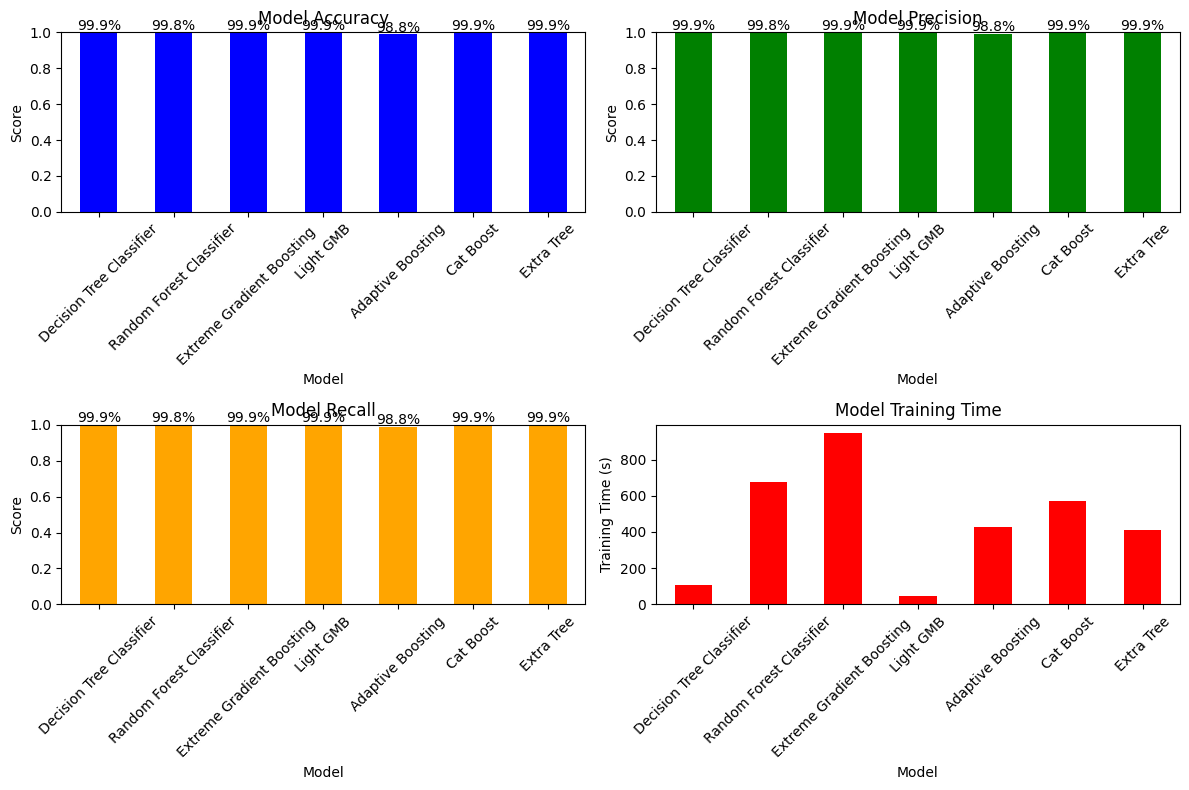

In [28]:
import matplotlib.pyplot as plt

# Create a dataframe from the metrics dictionary
df_models = pd.DataFrame(data=data, index=cicid_models.keys())

# Plotting the metrics
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
ax = df_models['Accuracy'].plot(kind='bar', color='blue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Precision plot
plt.subplot(2, 2, 2)
ax = df_models['Precision'].plot(kind='bar', color='green')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Precision')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Recall plot
plt.subplot(2, 2, 3)
ax = df_models['Recall'].plot(kind='bar', color='orange')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Recall')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Training time plot
plt.subplot(2, 2, 4)
df_models['Training time'].plot(kind='bar', color='red')
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Model Training Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


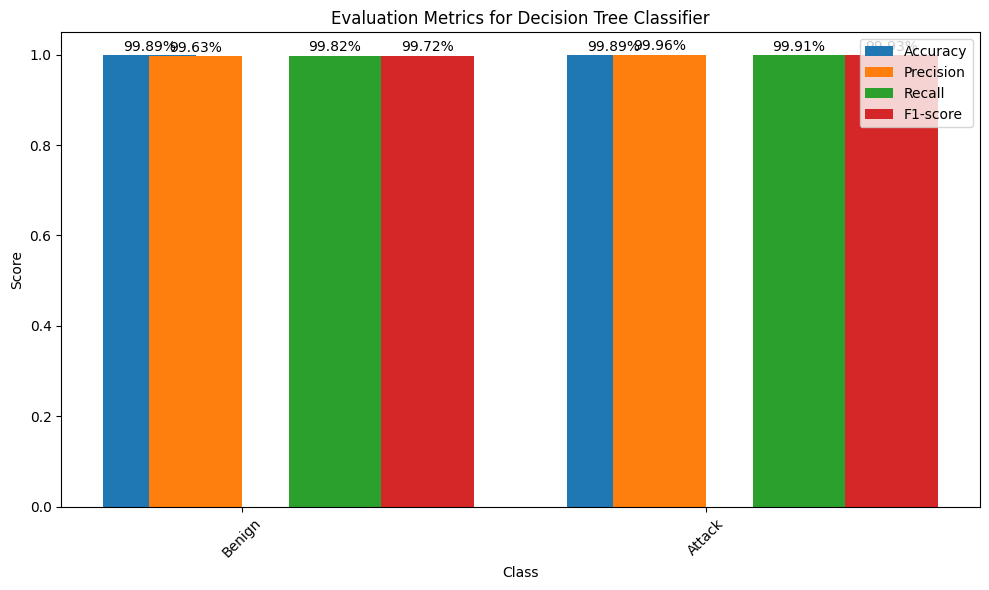

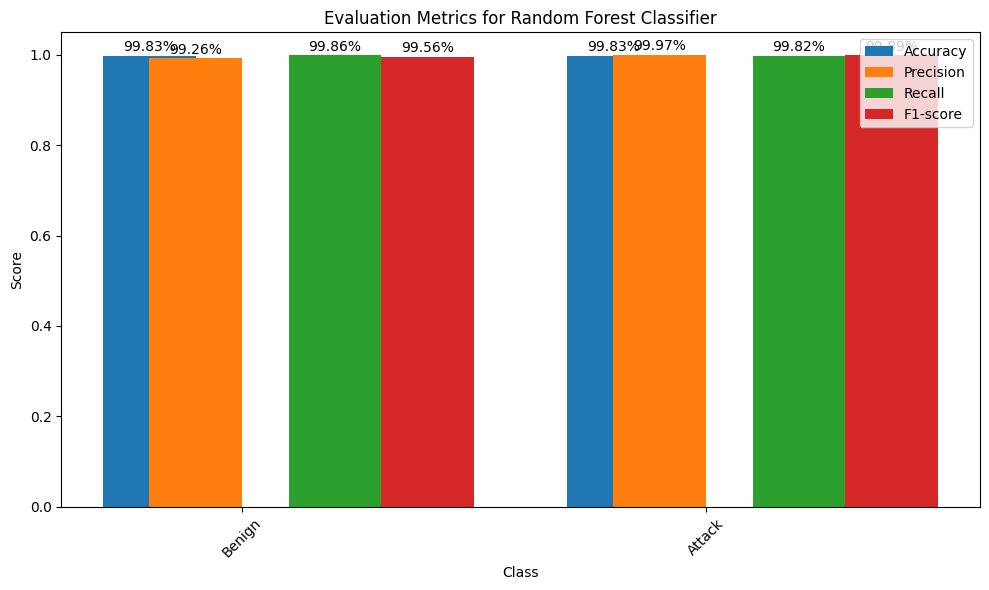

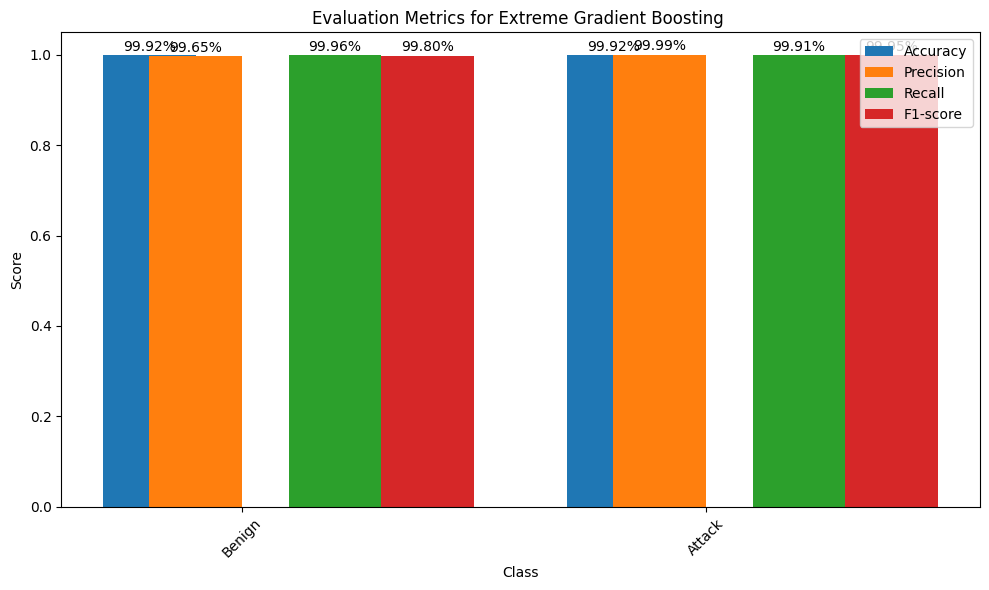

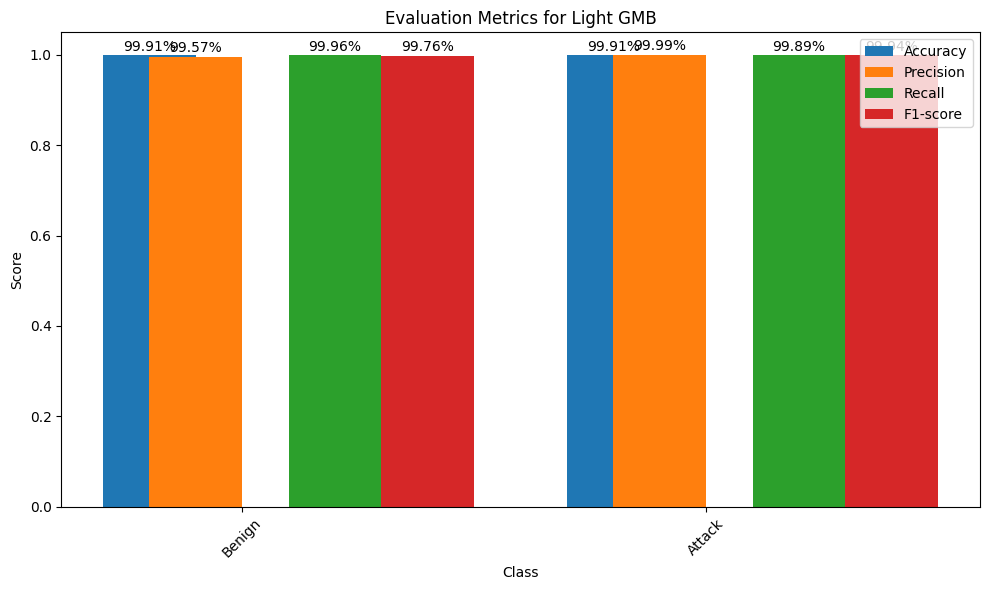

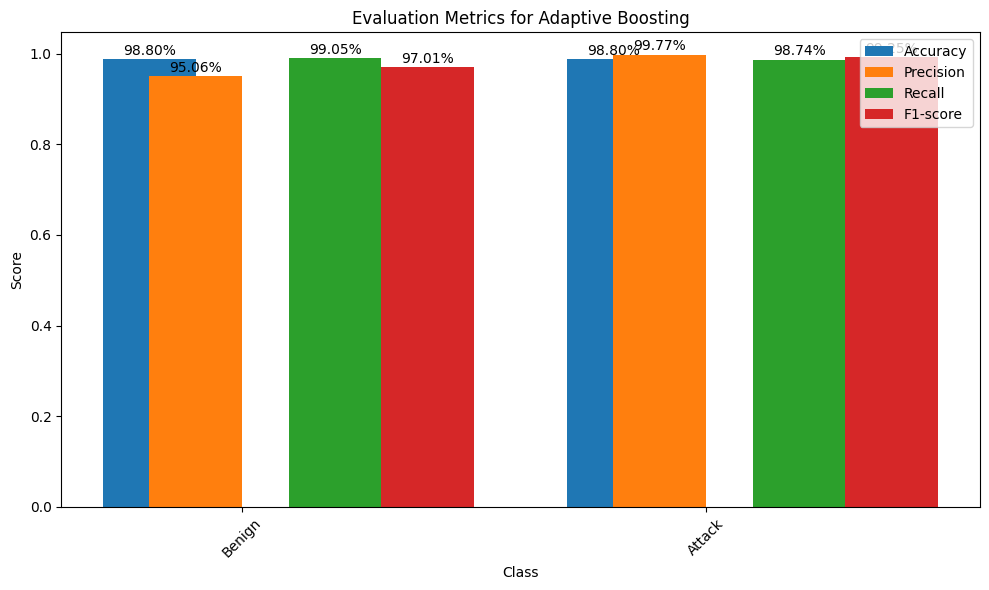

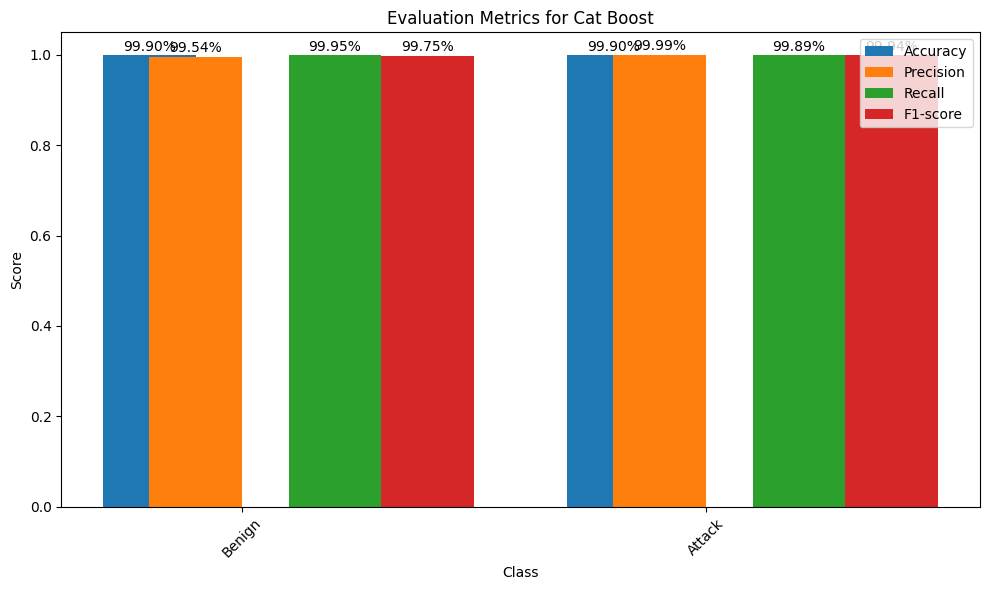

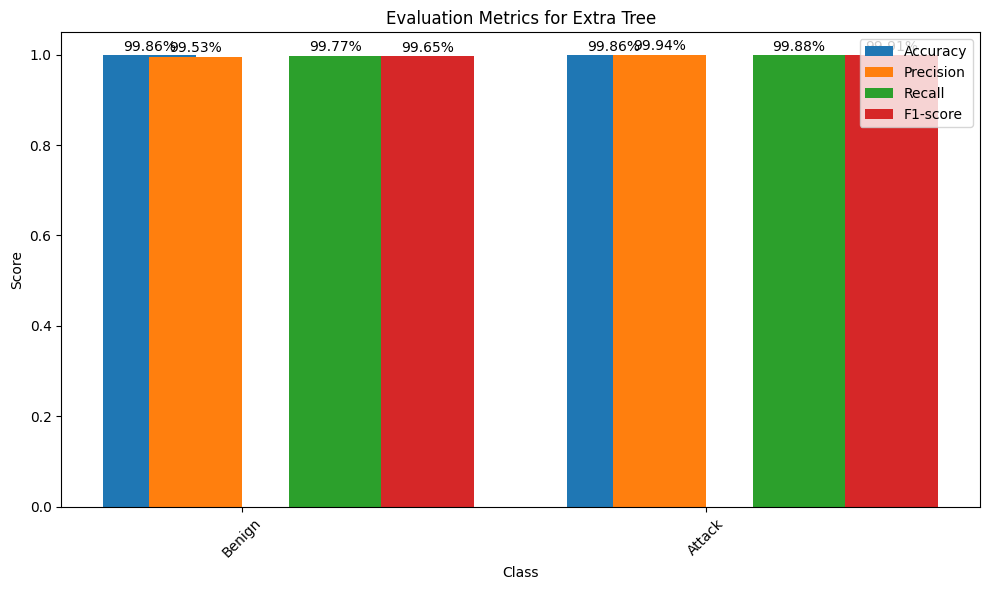

In [32]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

class_names = ['Benign', 'Attack']

for key, model in cicid_models.items():
    report = classification_report(y_test, y_pred[key], target_names=class_names, digits=4, zero_division=1, output_dict=True)
    accuracy = report['accuracy']
    precision = [report[label]['precision'] for label in class_names]
    recall = [report[label]['recall'] for label in class_names]
    f1_score = [report[label]['f1-score'] for label in class_names]

    # Plot bar plots for precision, recall, and F1-score
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(class_names))
    bar_width = 0.2

    accuracy_bar = ax.bar(index, accuracy, bar_width, label='Accuracy')
    precision_bar = ax.bar(index + bar_width/2, precision, bar_width, label='Precision')  # Adjusted position
    recall_bar = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
    f1_score_bar = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-score')


    # # Add percentage values on top of each bar
    for i, v in enumerate(accuracy_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    for i, v in enumerate(precision_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    for i, v in enumerate(recall_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    for i, v in enumerate(f1_score_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.set_title(f'Evaluation Metrics for {key}')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_names, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()



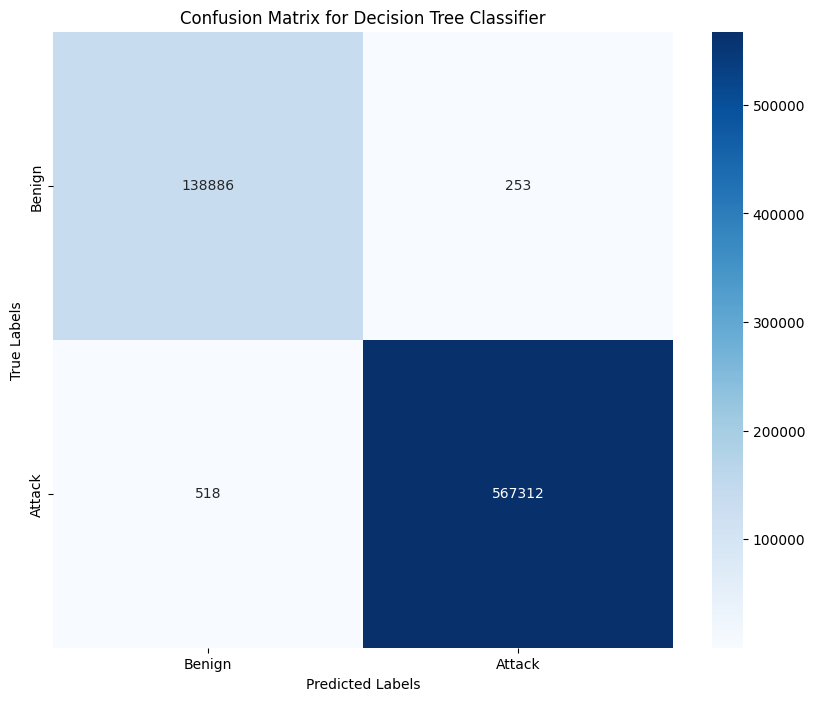

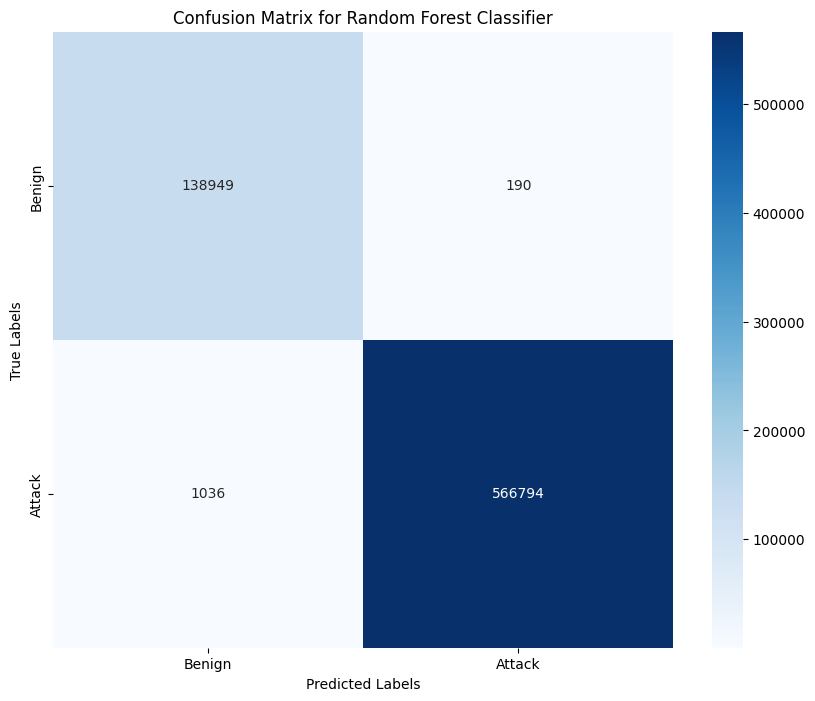

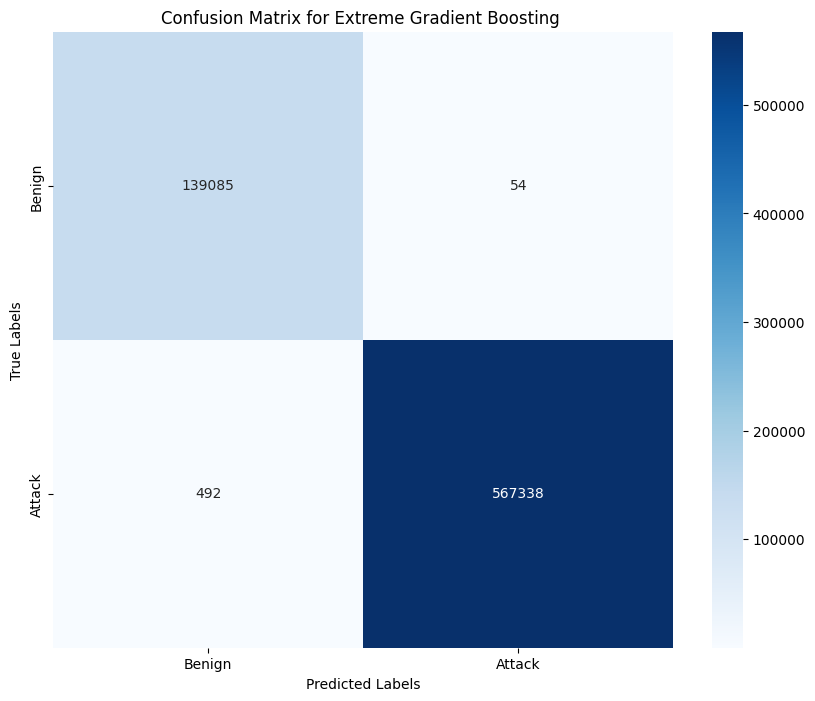

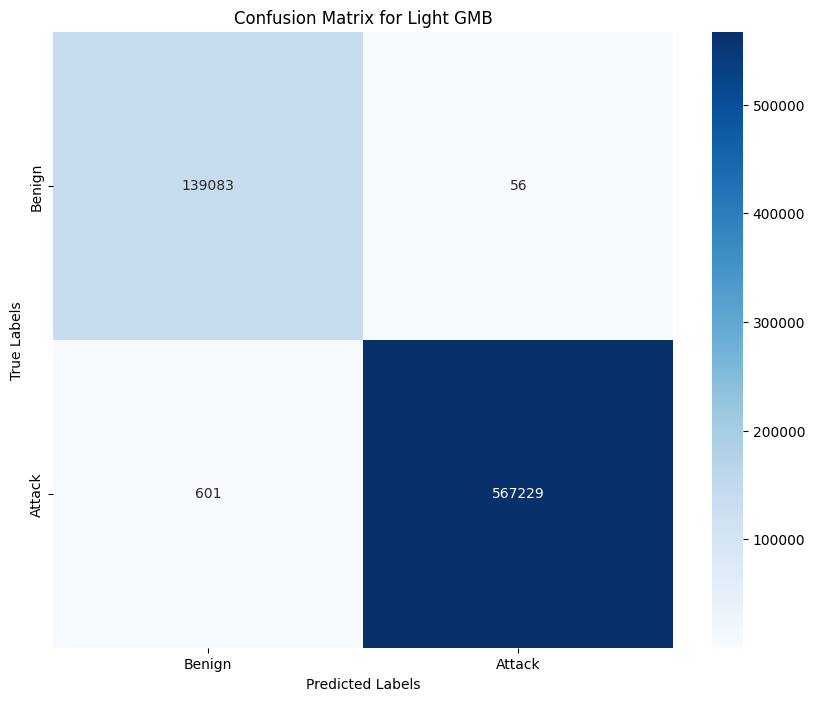

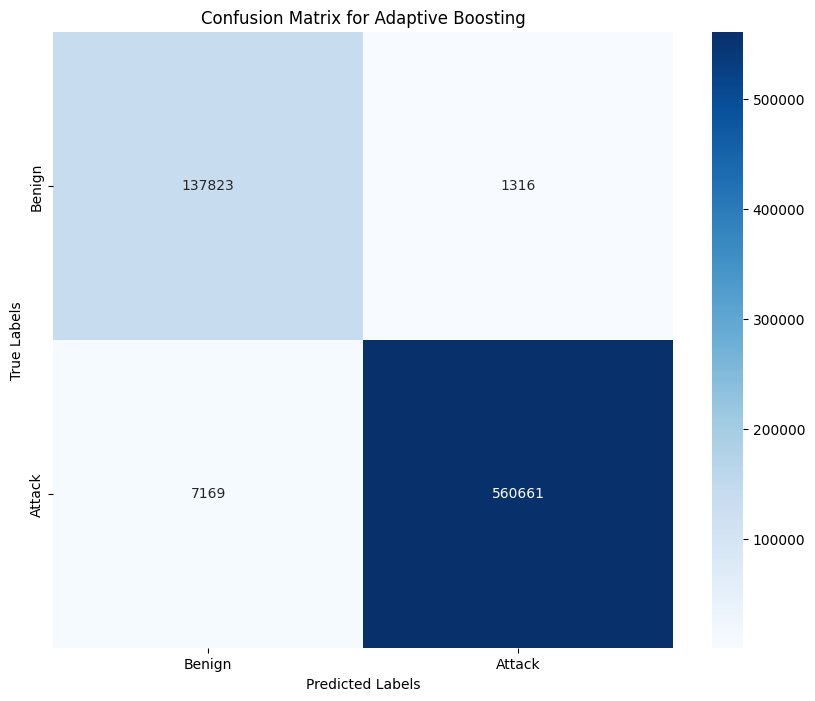

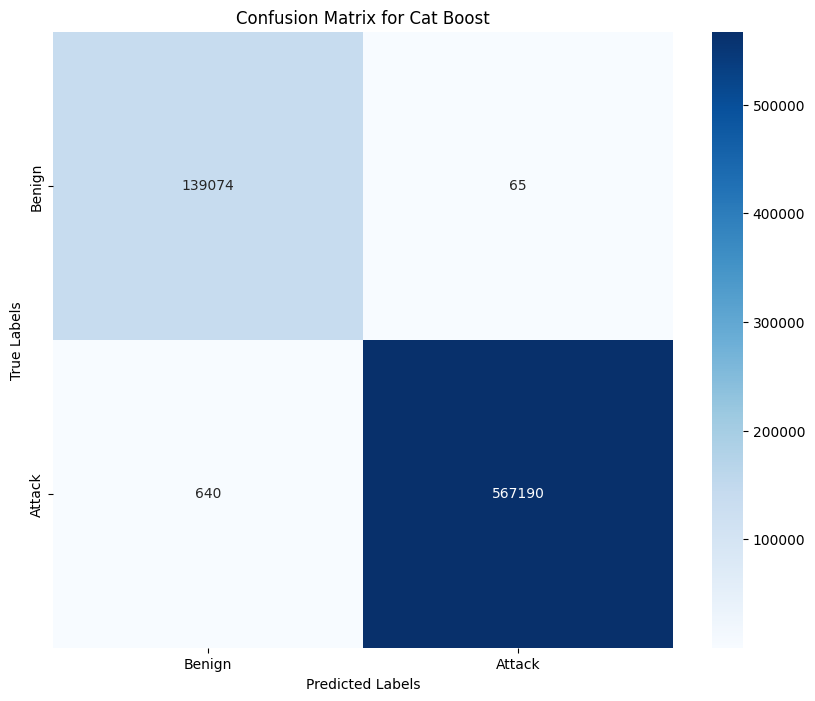

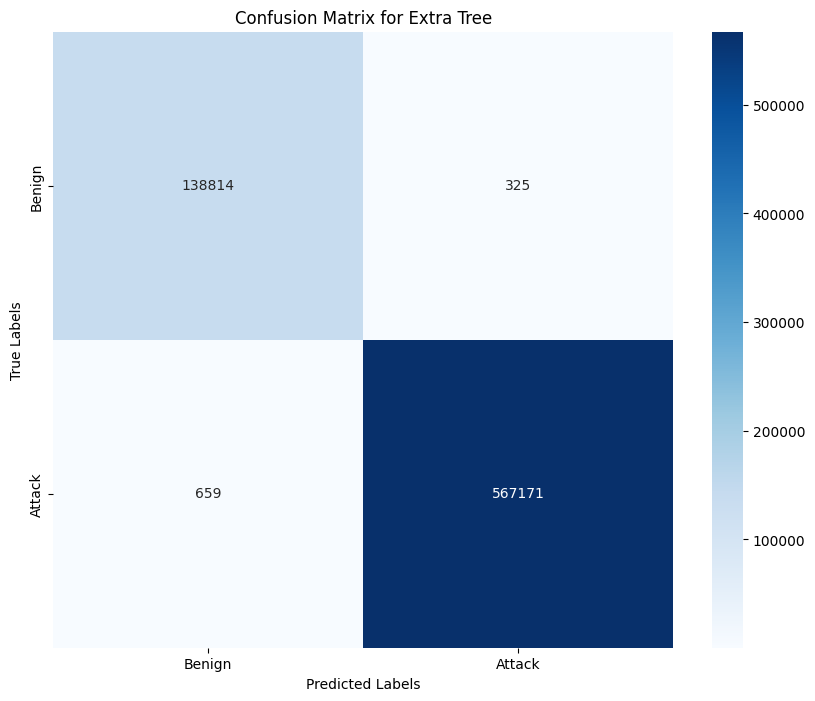

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['Benign', 'Attack']
for key, model in cicid_models.items():
    # Get the predicted labels and true labels
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {key}')
    plt.show()

### 3. Binary classificatio of IoT23 dataset 

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azizkarimy","key":"b60aa22eb988fe084b8c20ba2d6fa0e1"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                   25KB  2023-04-13 09:55:16          17877        492  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)             22KB  2023-05-12 13:06:39            833         31  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset                             3MB  2023-04-28 23:18:15           1745         43  1.0              
iammustafatz/diabetes-prediction-dataset                  Diabetes prediction dataset                   734KB  2023-04-0

In [6]:
!kaggle datasets download -d azizkarimy/iot23-20

 58% 5.00M/8.65M [00:00<00:00, 43.9MB/s]
100% 8.65M/8.65M [00:00<00:00, 61.8MB/s]


In [7]:
!unzip /content/iot23-20.zip

Archive:  /content/iot23-20.zip
  inflating: iot23_preprocessed.csv  


In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("/content/iot23_preprocessed.csv")

In [10]:
df['label'].value_counts()

PartOfAHorizontalPortScan    1610486
Okiru                         525761
Benign                        378806
DDoS                          264202
C&C                            15048
Attack                          6171
C&C0HeartBeat                    277
C&C0Torii                         30
C&C0FileDownload                  12
-1                                 7
FileDownload                       2
Name: label, dtype: int64

In [11]:
# Create a new column 'class' based on the 'type' column
df['Class'] = df['label'].apply(lambda x: 'Benign' if x == 'Benign' else 'attack')

# Drop the original 'type' column
df.drop('label', axis=1, inplace=True)


In [12]:
df['Class'].value_counts()

attack    2421996
Benign     378806
Name: Class, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from collections import Counter
y = df.Class
X = df.drop(columns='Class')
Classes = y.unique()
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42, stratify=y)

In [14]:
np.isnan(X_train).sum()
np.max(X_train)

X_train = np.nan_to_num(X_train,nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test,nan = np.nanmean(X_test))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_test = le.transform(y_test)

print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)


instances per label in training set
 attack    1816497
Benign     284104
Name: Class, dtype: int64
instances per label in test set
 attack    605499
Benign     94702
Name: Class, dtype: int64
(2100601, 25)
(700201, 25)
{'Benign': 0, 'attack': 1}


In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Define the desired number of instances of oversampling for each class
desired_counts = {
    0: 700000,    # Attacks
}
# Define the desired number of instances of undersamping for each class

undersampling_counts = {
    1: 1000000,  # BENIGN
}

# Create the oversampler and undersampler with the desired counts
over = SMOTE(sampling_strategy=desired_counts, k_neighbors=5, n_jobs=None)
under = RandomUnderSampler(sampling_strategy=undersampling_counts)

# Define the steps in the pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline to perform resampling
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Check the class distribution after resampling
counter = Counter(y_train_resampled)
print(counter)


Counter({1: 1000000, 0: 700000})


In [17]:
### transform ndarray into dataframe type for later operation.
X_train = pd.DataFrame(X_train_resampled)
y_train = pd.DataFrame(y_train_resampled )
X_test = pd.DataFrame(X_test)
from sklearn.feature_selection import f_classif
### Compute the ANOVA F-value 
f_value = f_classif(X_train, y_train)
### Now we select the top 10 important features based on the result above.
from sklearn.feature_selection import SelectKBest
sel_top_cols = SelectKBest(f_classif, k=10)
sel_top_cols.fit(X_train, y_train)
X_train.columns[sel_top_cols.get_support()]
### transform ndarray back:
X_train = X_train.values
X_test = X_test.values

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
!pip install catboost
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
import xgboost as xgb
import lightgbm  as lgb
import catboost as cb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
import time

i=0
iot23_models = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Extreme Gradient Boosting ': xgb.XGBClassifier(),
    'Light GMB':lgb.LGBMClassifier(),
    'Adaptive Boosting':AdaBoostClassifier(),
    'Cat Boost':cb.CatBoostClassifier() ,
    'Extra Tree':ExtraTreesClassifier()
}

train_score = {}
accuracy = {}
precision = {}
recall = {}
training_time = {}
y_pred = {}

for key, model in iot23_models.items():
    start_time = time.time()
    model.fit(X_train, y_train.values.ravel())
    training_time[key] = time.time() - start_time

    y_pred[key] = model.predict(X_test)

    train_score[key] = model.score(X_train, y_train)
    accuracy[key] = model.score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key], average='weighted')
    recall[key] = recall_score(y_test, y_pred[key], average='weighted')
    print(i)
    i +=1

joblib.dump(iot23_models,'iot23_models.pkl')



0
1
2
3
4
Learning rate set to 0.246795
0:	learn: 0.4170882	total: 376ms	remaining: 6m 15s
1:	learn: 0.3219829	total: 659ms	remaining: 5m 28s
2:	learn: 0.2902273	total: 943ms	remaining: 5m 13s
3:	learn: 0.2762262	total: 1.24s	remaining: 5m 9s
4:	learn: 0.2653003	total: 1.53s	remaining: 5m 4s
5:	learn: 0.2614246	total: 1.82s	remaining: 5m 1s
6:	learn: 0.2544465	total: 2.11s	remaining: 4m 59s
7:	learn: 0.2521526	total: 2.43s	remaining: 5m 1s
8:	learn: 0.2486463	total: 2.71s	remaining: 4m 58s
9:	learn: 0.2475359	total: 3.02s	remaining: 4m 59s
10:	learn: 0.2457390	total: 3.34s	remaining: 5m
11:	learn: 0.2441732	total: 3.62s	remaining: 4m 58s
12:	learn: 0.2430454	total: 3.9s	remaining: 4m 56s
13:	learn: 0.2418835	total: 4.21s	remaining: 4m 56s
14:	learn: 0.2410961	total: 4.5s	remaining: 4m 55s
15:	learn: 0.2390513	total: 4.82s	remaining: 4m 56s
16:	learn: 0.2380790	total: 5.24s	remaining: 5m 2s
17:	learn: 0.2359789	total: 5.8s	remaining: 5m 16s
18:	learn: 0.2355443	total: 6.34s	remaining: 5

NameError: ignored

In [21]:
data = {
    'Training score': train_score.values(),
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'Training time': training_time.values()
}

df_models = pd.DataFrame(data=data, index=iot23_models.keys())
print(df_models)

                            Training score  Accuracy  Precision    Recall  \
Decision Tree Classifier          0.923319  0.844070   0.865774  0.844070   
Random Forest Classifier          0.801061  0.895284   0.890045  0.895284   
Extreme Gradient Boosting         0.911277  0.932868   0.937004  0.932868   
Light GMB                         0.902535  0.919440   0.929148  0.919440   
Adaptive Boosting                 0.707031  0.878336   0.860567  0.878336   
Cat Boost                         0.903428  0.921544   0.930066  0.921544   
Extra Tree                        0.933006  0.877895   0.880125  0.877895   

                            Training time  
Decision Tree Classifier        18.405907  
Random Forest Classifier       240.913574  
Extreme Gradient Boosting      213.791690  
Light GMB                       13.961166  
Adaptive Boosting               78.930118  
Cat Boost                      311.027598  
Extra Tree                     202.300460  


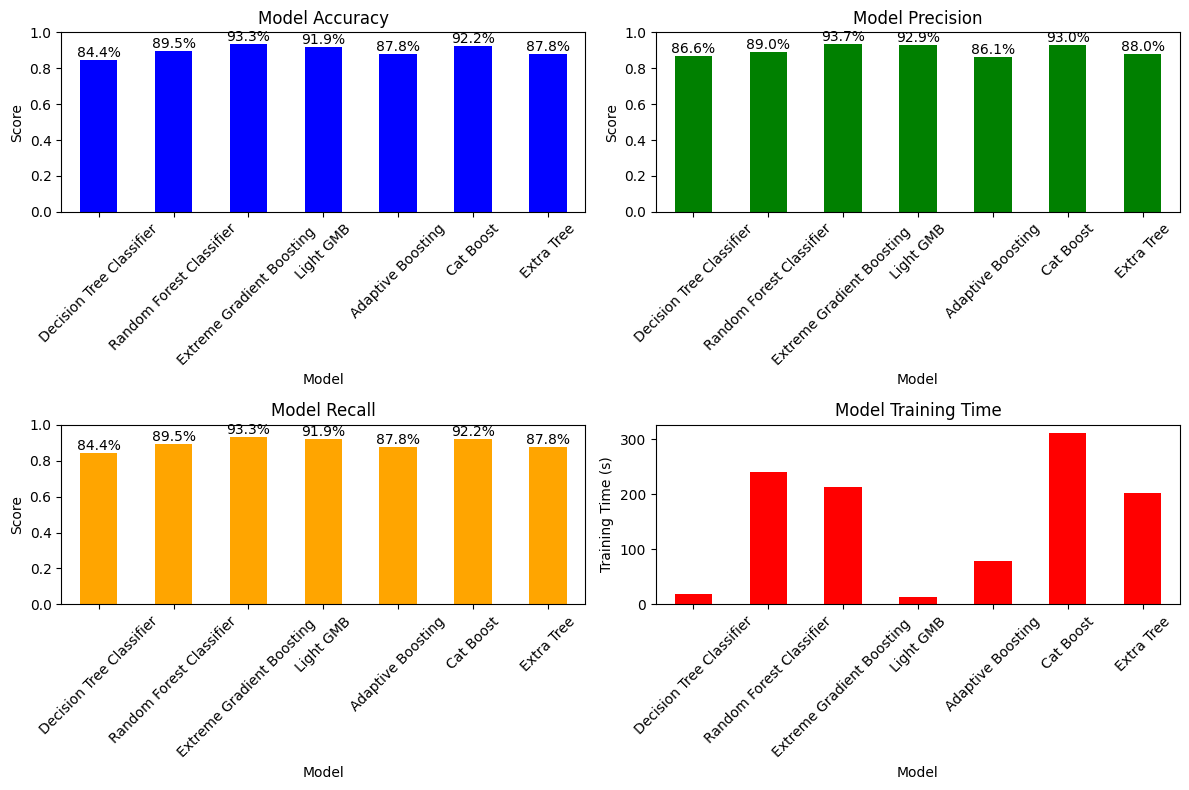

In [22]:
import matplotlib.pyplot as plt

# Create a dataframe from the metrics dictionary
df_models = pd.DataFrame(data=data, index=iot23_models.keys())

# Plotting the metrics
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
ax = df_models['Accuracy'].plot(kind='bar', color='blue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Precision plot
plt.subplot(2, 2, 2)
ax = df_models['Precision'].plot(kind='bar', color='green')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Precision')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Recall plot
plt.subplot(2, 2, 3)
ax = df_models['Recall'].plot(kind='bar', color='orange')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Recall')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Training time plot
plt.subplot(2, 2, 4)
df_models['Training time'].plot(kind='bar', color='red')
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Model Training Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


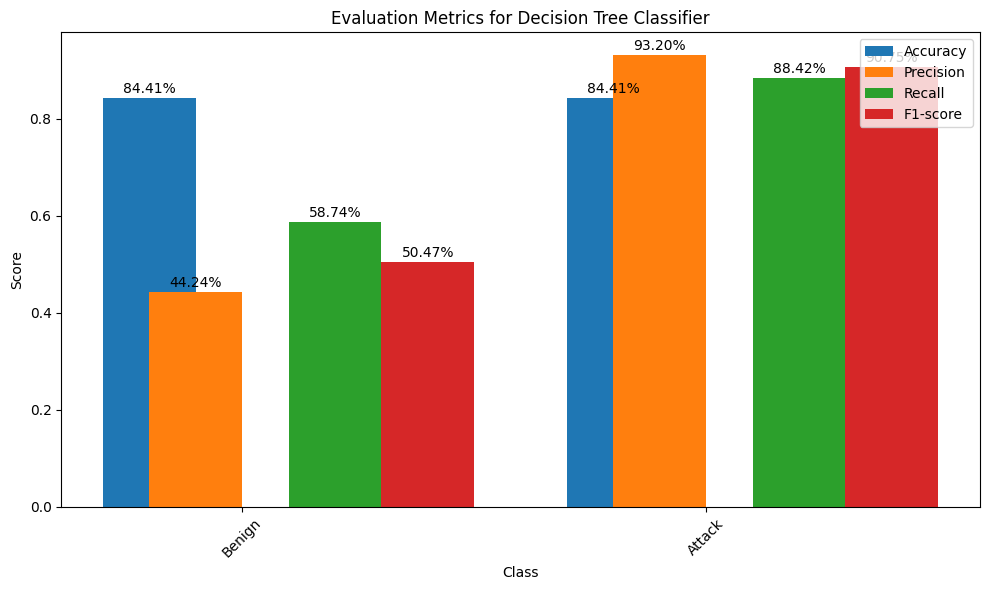

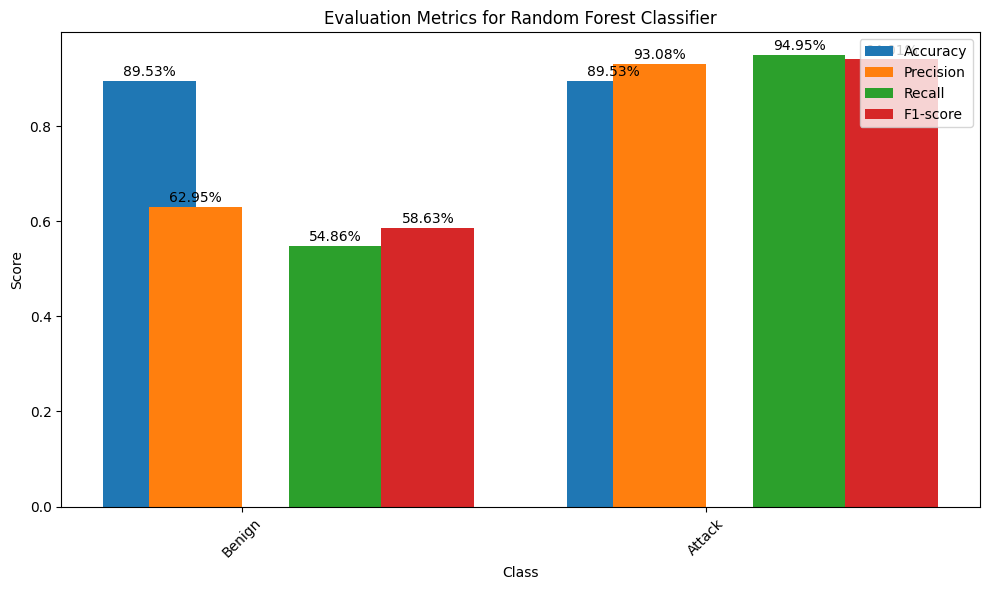

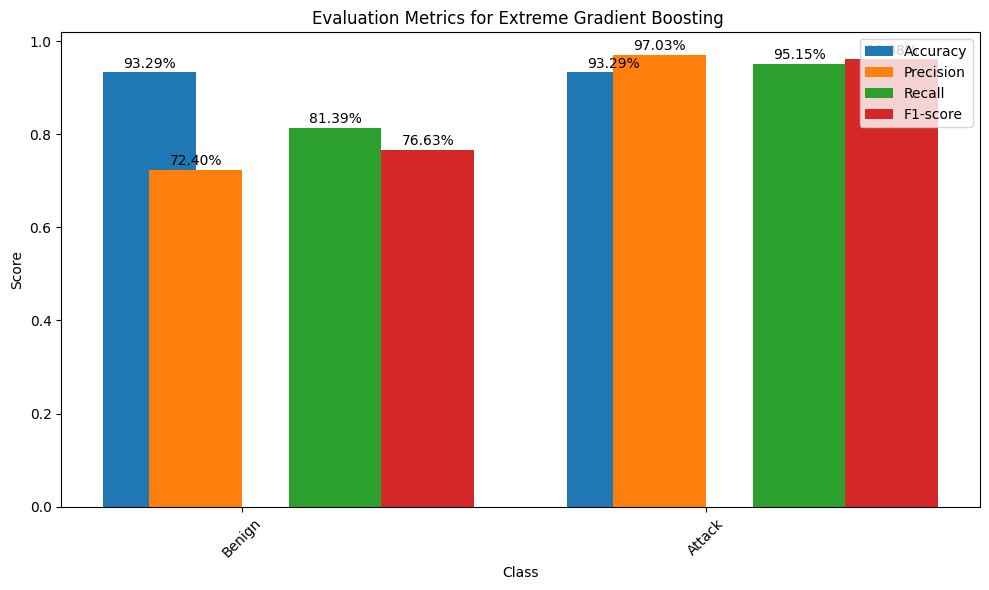

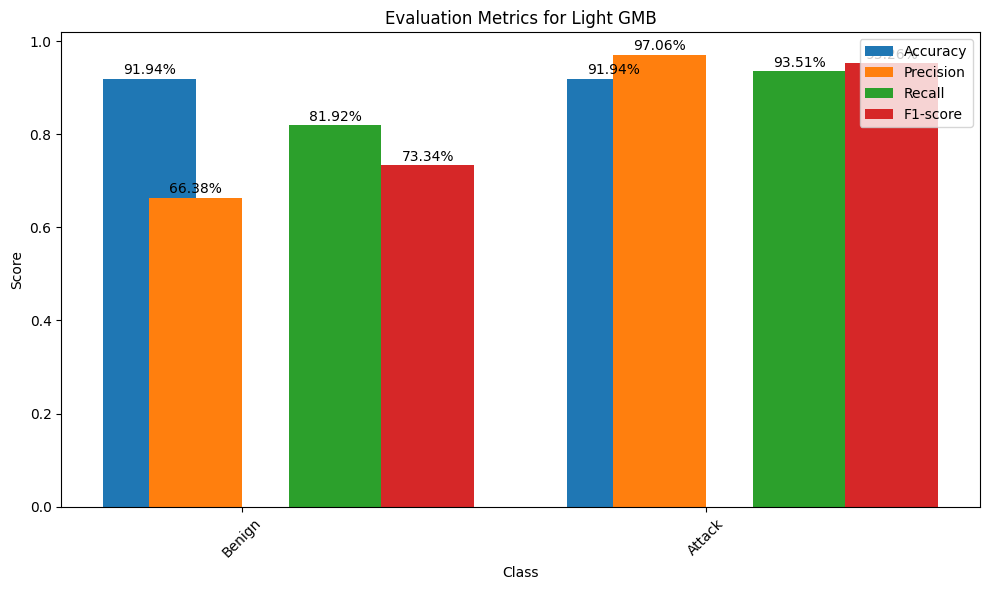

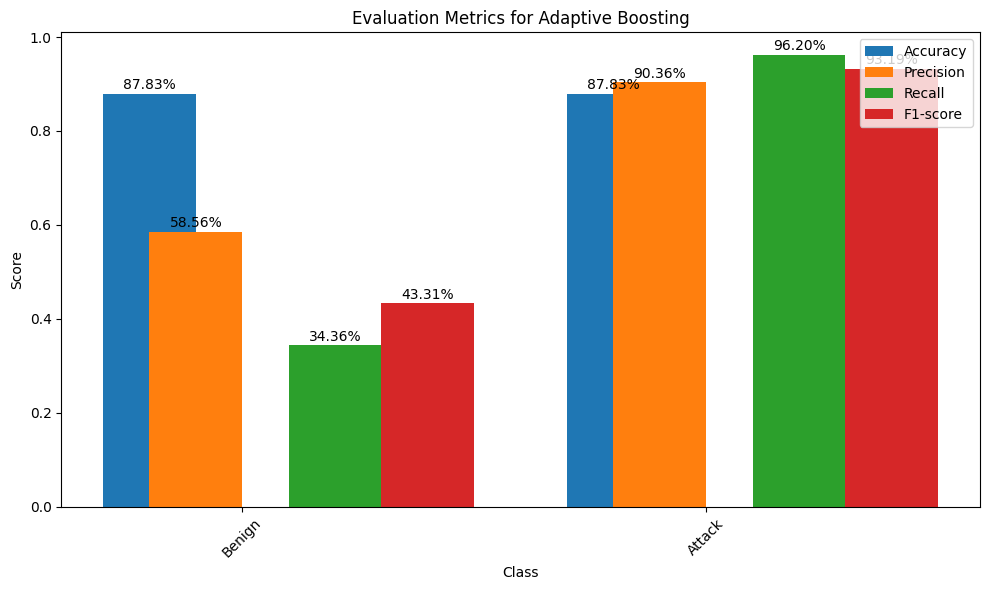

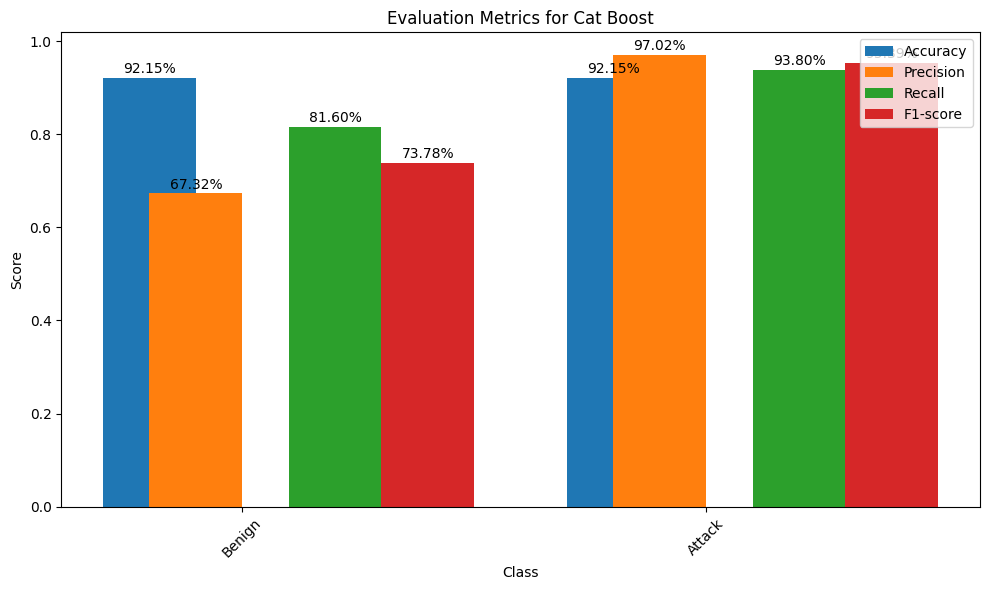

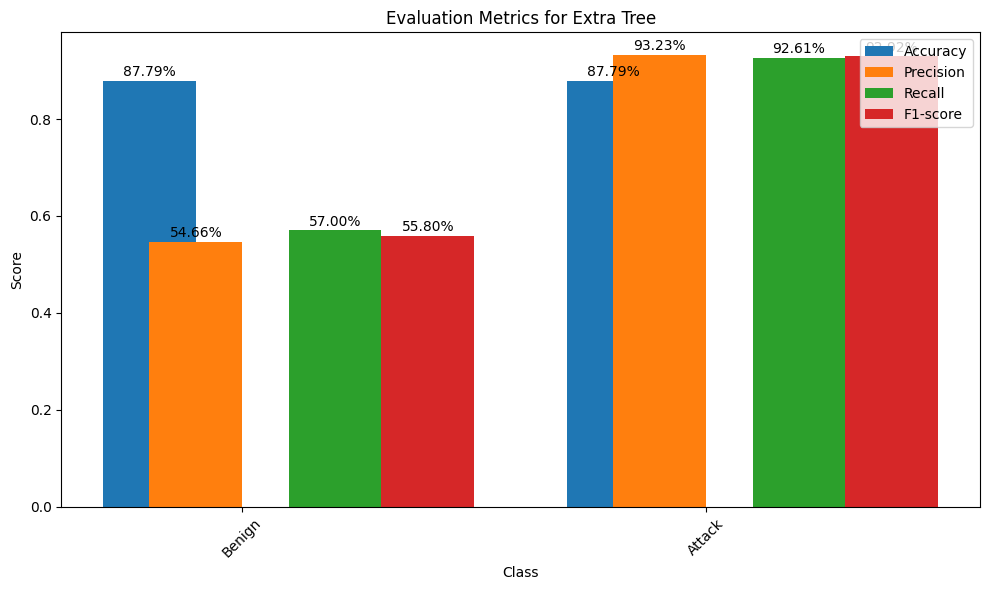

In [23]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

class_names = ['Benign', 'Attack']

for key, model in iot23_models.items():
    report = classification_report(y_test, y_pred[key], target_names=class_names, digits=4, zero_division=1, output_dict=True)
    accuracy = report['accuracy']
    precision = [report[label]['precision'] for label in class_names]
    recall = [report[label]['recall'] for label in class_names]
    f1_score = [report[label]['f1-score'] for label in class_names]

    # Plot bar plots for precision, recall, and F1-score
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(class_names))
    bar_width = 0.2

    accuracy_bar = ax.bar(index, accuracy, bar_width, label='Accuracy')
    precision_bar = ax.bar(index + bar_width/2, precision, bar_width, label='Precision')  # Adjusted position
    recall_bar = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
    f1_score_bar = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-score')


    # # Add percentage values on top of each bar
    for i, v in enumerate(accuracy_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    for i, v in enumerate(precision_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    for i, v in enumerate(recall_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    for i, v in enumerate(f1_score_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.set_title(f'Evaluation Metrics for {key}')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_names, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()




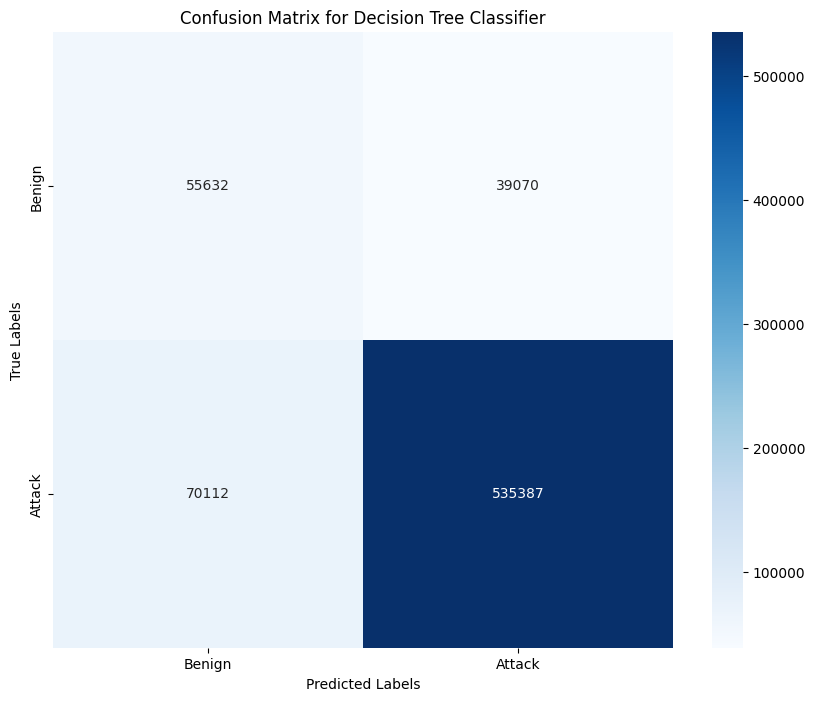

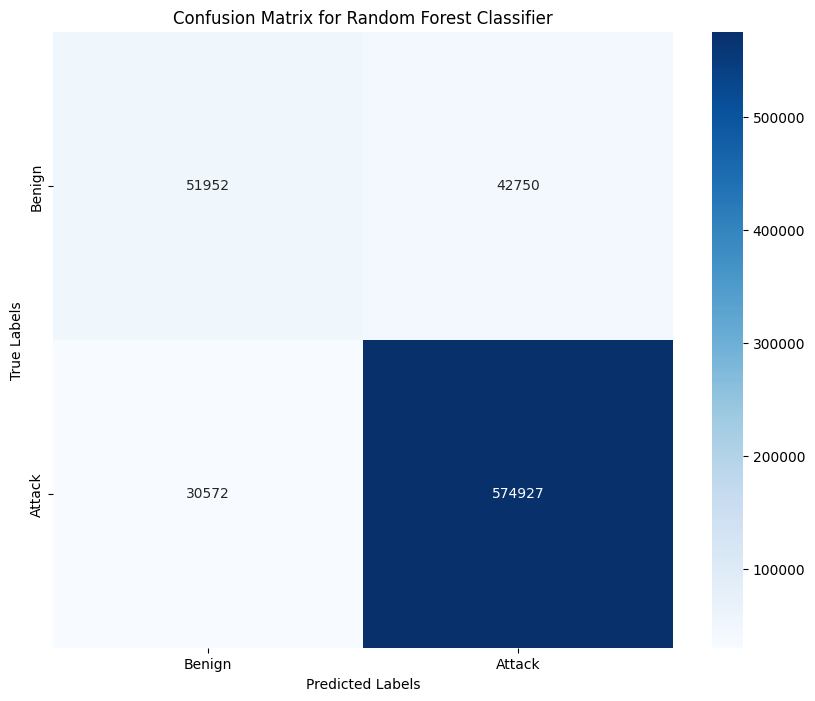

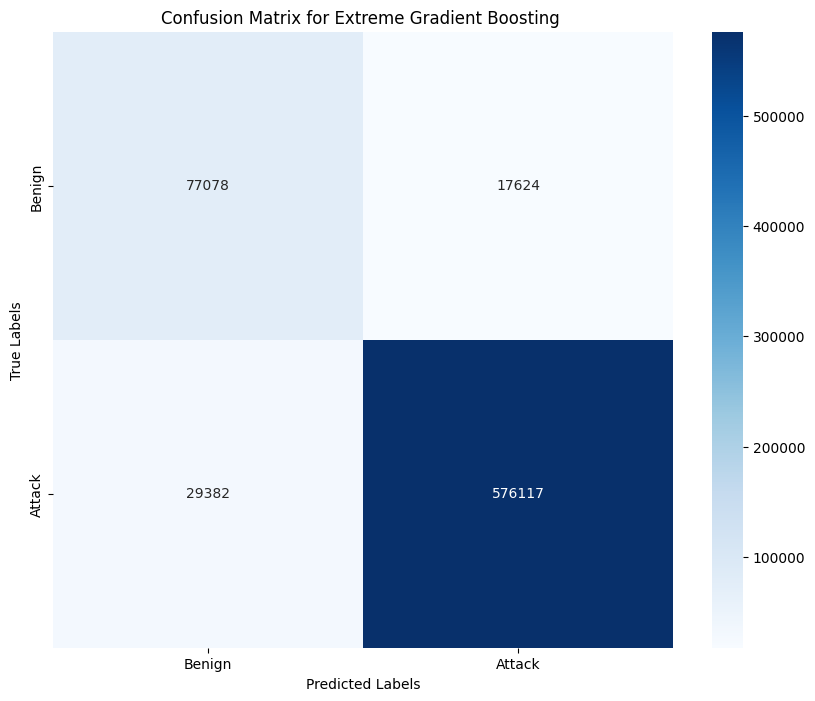

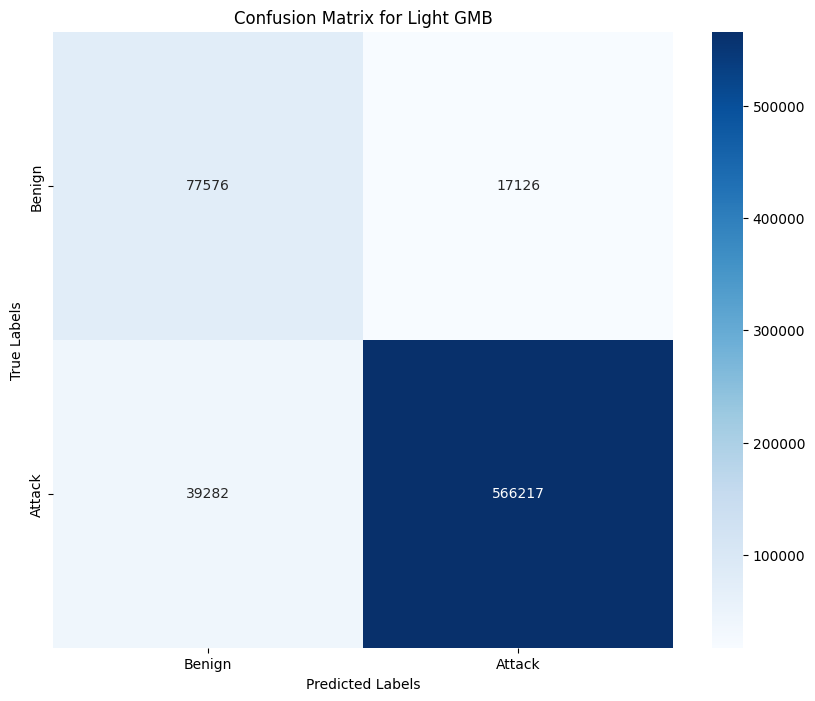

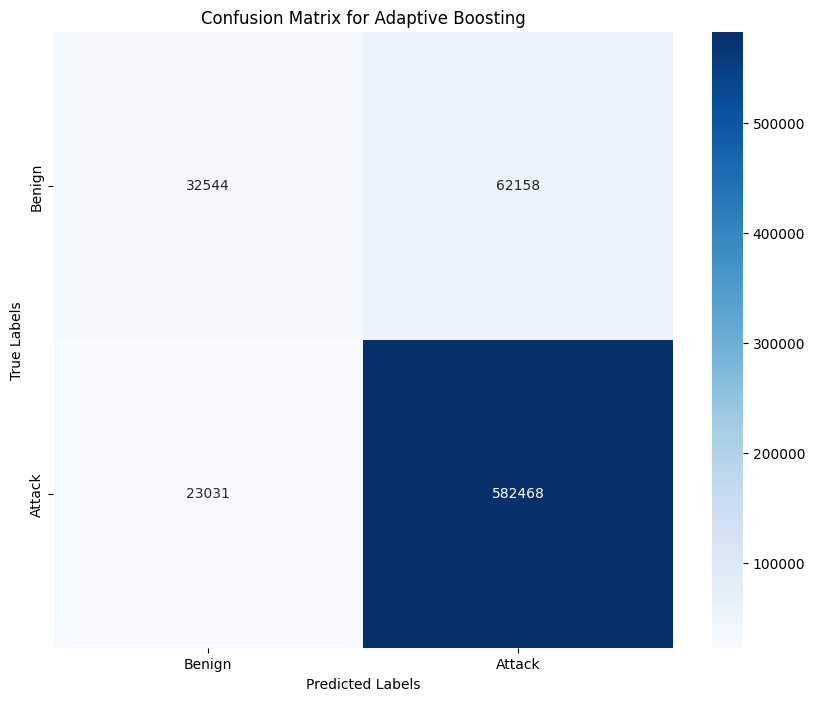

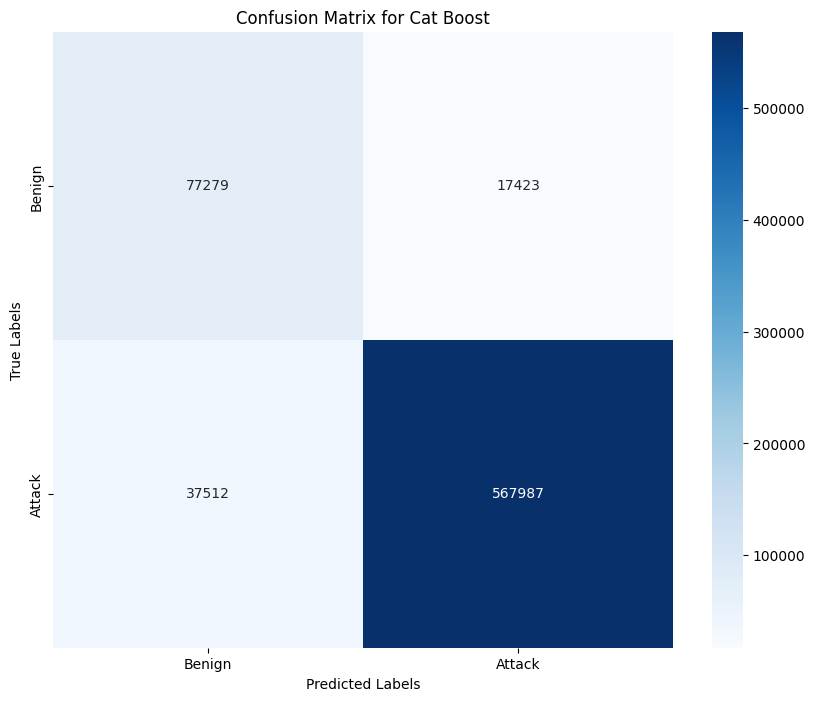

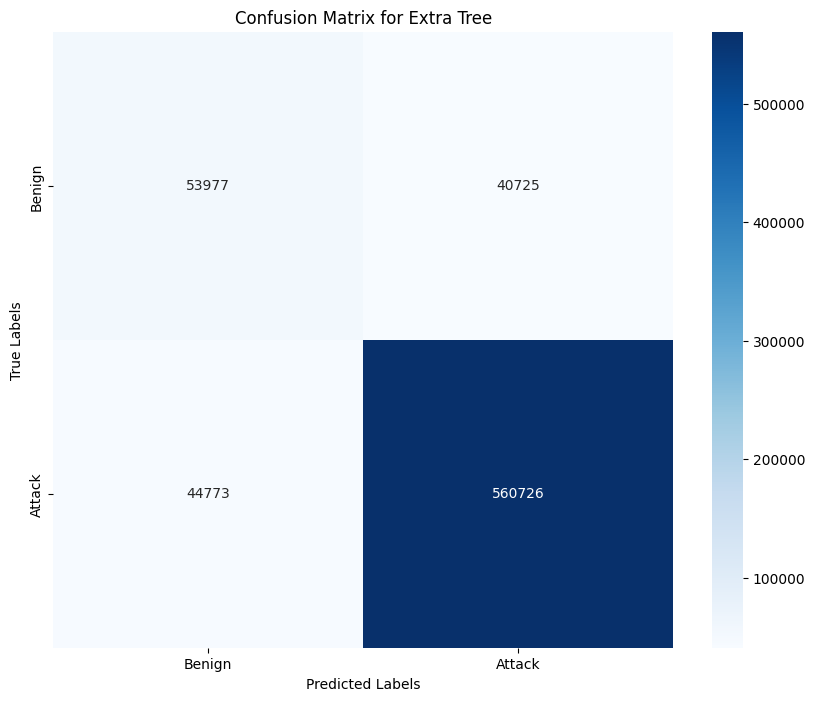

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['Benign', 'Attack']
for key, model in iot23_models.items():
    # Get the predicted labels and true labels
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {key}')
    plt.show()

### 4. EdgeIIoT dataset

In [1]:
import pandas as pd
import numpy as np


In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azizkarimy","key":"b60aa22eb988fe084b8c20ba2d6fa0e1"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                   25KB  2023-04-13 09:55:16          18415        513  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)             22KB  2023-05-12 13:06:39           1041         37  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset                             3MB  2023-04-28 23:18:15           1889         44  1.0              
iammustafatz/diabetes-prediction-dataset                  Diabetes prediction dataset                   734KB  2023-04-0

In [6]:
!kaggle datasets download -d azizkarimy/edgeiiot-preprocessed

 80% 31.0M/38.8M [00:01<00:00, 27.5MB/s]
100% 38.8M/38.8M [00:01<00:00, 36.6MB/s]


In [8]:
!unzip /content/edgeiiot-preprocessed.zip

Archive:  /content/edgeiiot-preprocessed.zip
replace preprocessed_EdgeIIoT.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: preprocessed_EdgeIIoT.csv  y



In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('/content/preprocessed_EdgeIIoT.csv')

In [11]:
df.shape

(2224601, 97)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224601 entries, 0 to 2224600
Data columns (total 97 columns):
 #   Column                                                                                                Dtype  
---  ------                                                                                                -----  
 0   arp.opcode                                                                                            float64
 1   arp.hw.size                                                                                           float64
 2   icmp.checksum                                                                                         float64
 3   icmp.seq_le                                                                                           float64
 4   icmp.unused                                                                                           float64
 5   http.content_length                                                          

In [13]:
df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.0,3.954331e+09,...,0,0,0,0,0,1,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,5.246139e+08,...,0,0,0,0,1,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267666.0,2.371892e+09,...,0,0,0,0,1,0,0,1,0,0
3,0.0,0.0,16176.0,51313.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0,0,0,0,0,1,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0,0,0,0,1,0,0,1,0,0


In [14]:
df['Attack_label'].value_counts()

0    1615643
1     608958
Name: Attack_label, dtype: int64

In [15]:
df['Attack_type'].value_counts()

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        4114
Fingerprinting              3501
Name: Attack_type, dtype: int64

In [16]:
#shuffle rows of dataframe 
sampler=np.random.permutation(len(df))
data=df.take(sampler)
df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.0,3.954331e+09,...,0,0,0,0,0,1,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,5.246139e+08,...,0,0,0,0,1,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267666.0,2.371892e+09,...,0,0,0,0,1,0,0,1,0,0
3,0.0,0.0,16176.0,51313.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0,0,0,0,0,1,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0,0,0,0,1,0,0,1,0,0


In [17]:
# data split
from sklearn.model_selection import train_test_split
from collections import Counter
y = df.Attack_label
X = df.drop(columns=['Attack_type','Attack_label'])
Classes = y.unique()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [18]:
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Maximum value in X_train:", np.max(X_train))
# Handle missing values
# For example, using mean imputation
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))

Missing values in X_train: arp.opcode                             0
arp.hw.size                            0
icmp.checksum                          0
icmp.seq_le                            0
icmp.unused                            0
                                      ..
mqtt.protoname-0.0                     0
mqtt.protoname-MQTT                    0
mqtt.topic-0                           0
mqtt.topic-0.0                         0
mqtt.topic-Temperature_and_Humidity    0
Length: 95, dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Maximum value in X_train: arp.opcode                                 2.0
arp.hw.size                                6.0
icmp.checksum                          65533.0
icmp.seq_le                            65534.0
icmp.unused                                0.0
                                        ...   
mqtt.protoname-0.0                         1.0
mqtt.protoname-MQTT                        1.0
mqtt.topic-0                               1.0
mqtt.topic-0.0                             1.0
mqtt.topic-Temperature_and_Humidity        1.0
Length: 95, dtype: float64


In [19]:
type(y_train)

pandas.core.series.Series

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_test = le.transform(y_test)

print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)


instances per label in training set
 0    1211732
1     456718
Name: Attack_label, dtype: int64
instances per label in test set
 0    403911
1    152240
Name: Attack_label, dtype: int64
(1668450, 95)
(556151, 95)
{0: 0, 1: 1}


In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Define the desired number of instances of oversampling for each class
desired_counts = {
    1: 700000,    # Attacks
}
# Define the desired number of instances of undersamping for each class

undersampling_counts = {
    0: 900000,  # Normal
}

# Create the oversampler and undersampler with the desired counts
over = SMOTE(sampling_strategy=desired_counts, k_neighbors=5, n_jobs=None)
under = RandomUnderSampler(sampling_strategy=undersampling_counts)

# Define the steps in the pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline to perform resampling
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Check the class distribution after resampling
counter = Counter(y_train_resampled)
print(counter)


Counter({0: 900000, 1: 700000})


In [22]:
### transform ndarray into dataframe type for later operation.
X_train = pd.DataFrame(X_train_resampled)
y_train = pd.DataFrame(y_train_resampled )
X_test = pd.DataFrame(X_test)
from sklearn.feature_selection import f_classif
### Compute the ANOVA F-value 
f_value = f_classif(X_train, y_train)
### Now we select the top 10 important features based on the result above.
from sklearn.feature_selection import SelectKBest
sel_top_cols = SelectKBest(f_classif, k=10)
sel_top_cols.fit(X_train, y_train)
X_train.columns[sel_top_cols.get_support()]
### transform ndarray back:
X_train = X_train.values
X_test = X_test.values

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4  7 23 31 52 77 85 86 90 93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expect

In [23]:
!pip install catboost
!pip install joblib
# !pip install xgboost
# !pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
import xgboost as xgb
import lightgbm  as lgb
import catboost as cb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
import time
import joblib
i=0
edgeiiot_models = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Extreme Gradient Boosting ': xgb.XGBClassifier(),
    'Light GMB':lgb.LGBMClassifier(),
    'Adaptive Boosting':AdaBoostClassifier(),
    'Cat Boost':cb.CatBoostClassifier() ,
    'Extra Tree':ExtraTreesClassifier()
}

train_score = {}
accuracy = {}
precision = {}
recall = {}
training_time = {}
y_pred = {}

for key, model in edgeiiot_models.items():
    start_time = time.time()
    model.fit(X_train, y_train.values.ravel())
    training_time[key] = time.time() - start_time

    y_pred[key] = model.predict(X_test)

    train_score[key] = model.score(X_train, y_train)
    accuracy[key] = model.score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key], average='weighted')
    recall[key] = recall_score(y_test, y_pred[key], average='weighted')
    print(i)
    i +=1


joblib.dump(edgeiiot_models,'edgeiiot_models.pkl')


0
1
2
3
4
Learning rate set to 0.240488
0:	learn: 0.0705847	total: 398ms	remaining: 6m 37s
1:	learn: 0.0099180	total: 682ms	remaining: 5m 40s
2:	learn: 0.0022243	total: 956ms	remaining: 5m 17s
3:	learn: 0.0007275	total: 1.21s	remaining: 5m 2s
4:	learn: 0.0003698	total: 1.62s	remaining: 5m 22s
5:	learn: 0.0001491	total: 2.12s	remaining: 5m 50s
6:	learn: 0.0000753	total: 2.62s	remaining: 6m 11s
7:	learn: 0.0000561	total: 3.03s	remaining: 6m 16s
8:	learn: 0.0000386	total: 3.27s	remaining: 6m
9:	learn: 0.0000384	total: 3.5s	remaining: 5m 46s
10:	learn: 0.0000384	total: 3.76s	remaining: 5m 38s
11:	learn: 0.0000384	total: 4.01s	remaining: 5m 29s
12:	learn: 0.0000384	total: 4.24s	remaining: 5m 21s
13:	learn: 0.0000384	total: 4.47s	remaining: 5m 15s
14:	learn: 0.0000384	total: 4.71s	remaining: 5m 9s
15:	learn: 0.0000384	total: 4.95s	remaining: 5m 4s
16:	learn: 0.0000384	total: 5.19s	remaining: 5m
17:	learn: 0.0000384	total: 5.43s	remaining: 4m 56s
18:	learn: 0.0000384	total: 5.67s	remaining: 4

['edgeiiot_models.pkl']

In [25]:
data = {
    'Training score': train_score.values(),
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'Training time': training_time.values()
}

df_models = pd.DataFrame(data=data, index=edgeiiot_models.keys())
print(df_models)

                            Training score  Accuracy  Precision  Recall  \
Decision Tree Classifier               1.0       1.0        1.0     1.0   
Random Forest Classifier               1.0       1.0        1.0     1.0   
Extreme Gradient Boosting              1.0       1.0        1.0     1.0   
Light GMB                              1.0       1.0        1.0     1.0   
Adaptive Boosting                      1.0       1.0        1.0     1.0   
Cat Boost                              1.0       1.0        1.0     1.0   
Extra Tree                             1.0       1.0        1.0     1.0   

                            Training time  
Decision Tree Classifier         3.585206  
Random Forest Classifier        68.284426  
Extreme Gradient Boosting      158.261910  
Light GMB                       11.762752  
Adaptive Boosting                5.025777  
Cat Boost                      302.351671  
Extra Tree                      56.944439  


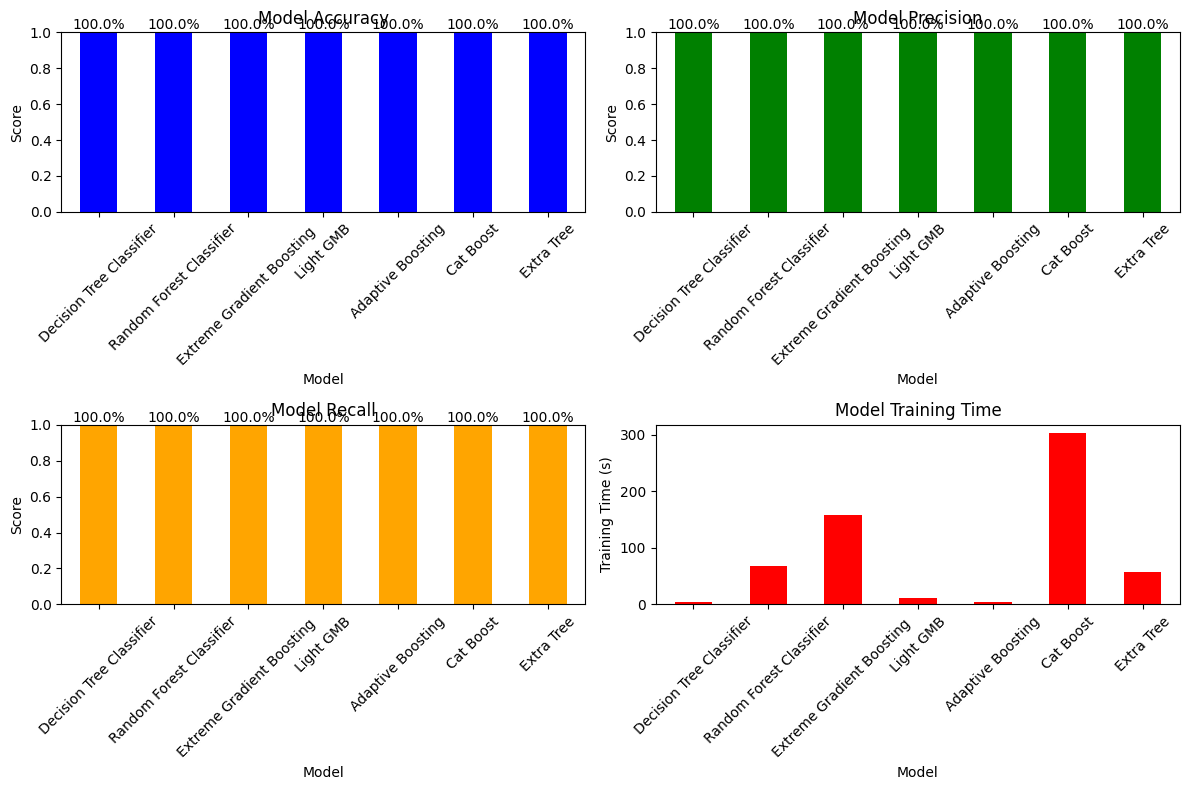

In [28]:
import matplotlib.pyplot as plt

# Create a dataframe from the metrics dictionary
df_models = pd.DataFrame(data=data, index=edgeiiot_models.keys())

# Plotting the metrics
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
ax = df_models['Accuracy'].plot(kind='bar', color='blue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Precision plot
plt.subplot(2, 2, 2)
ax = df_models['Precision'].plot(kind='bar', color='green')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Precision')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Recall plot
plt.subplot(2, 2, 3)
ax = df_models['Recall'].plot(kind='bar', color='orange')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Recall')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage text to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Training time plot
plt.subplot(2, 2, 4)
df_models['Training time'].plot(kind='bar', color='red')
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Model Training Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


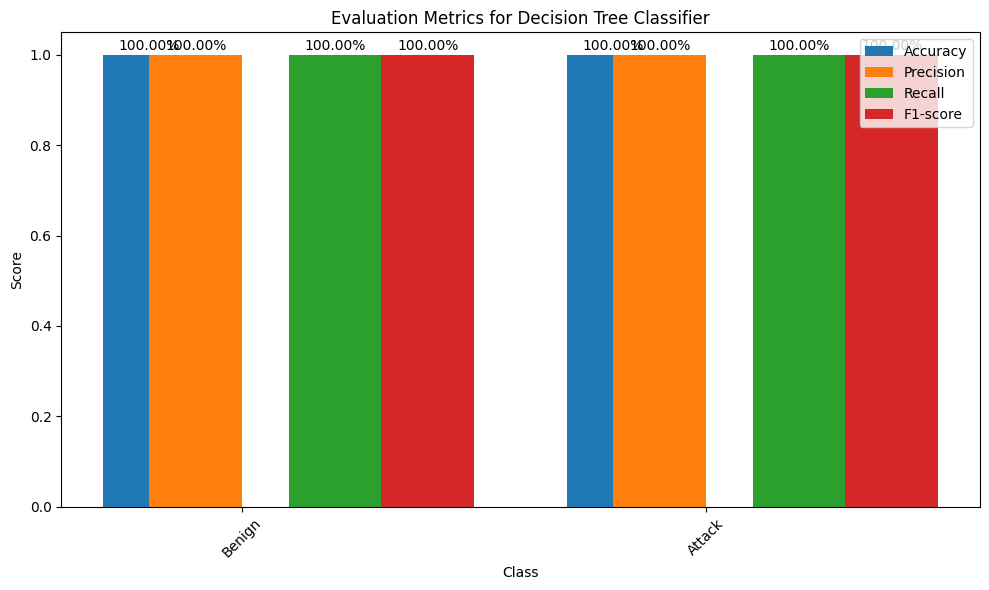

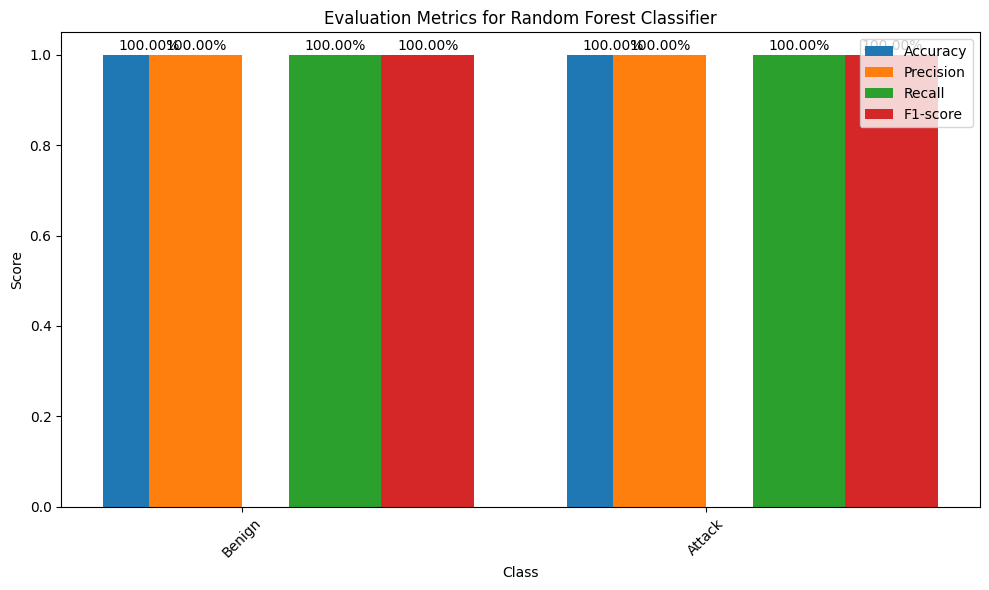

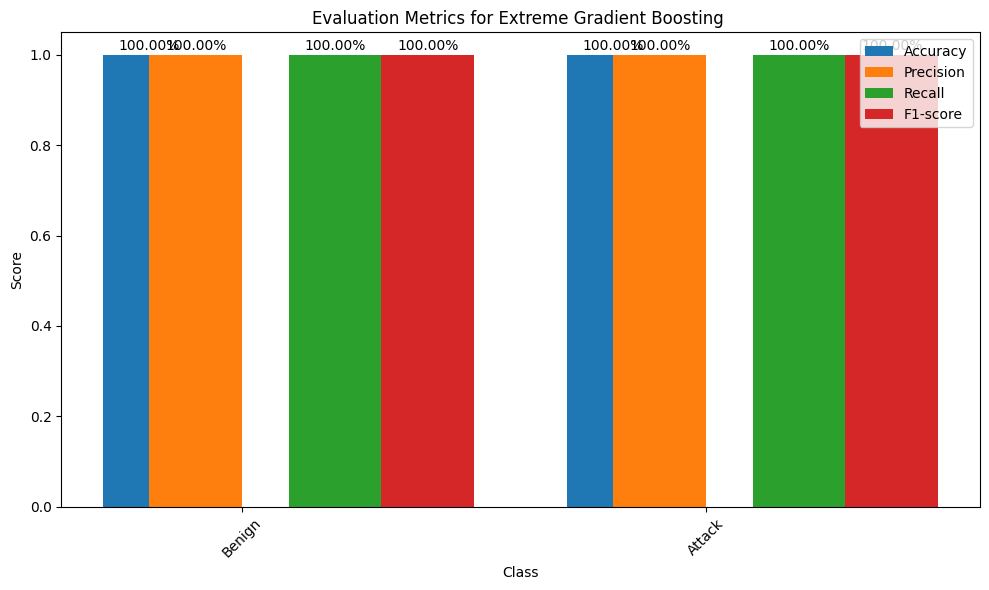

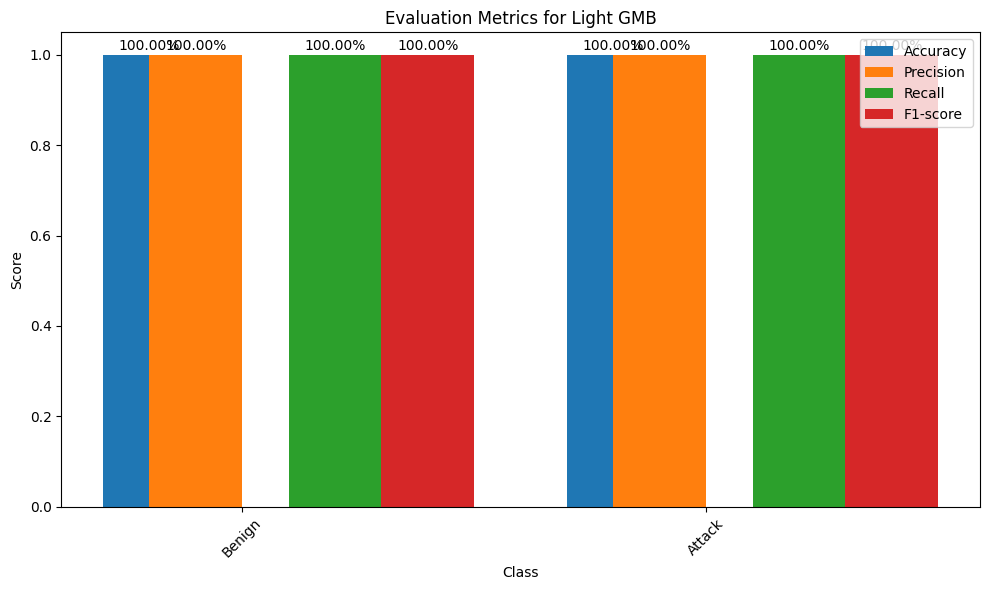

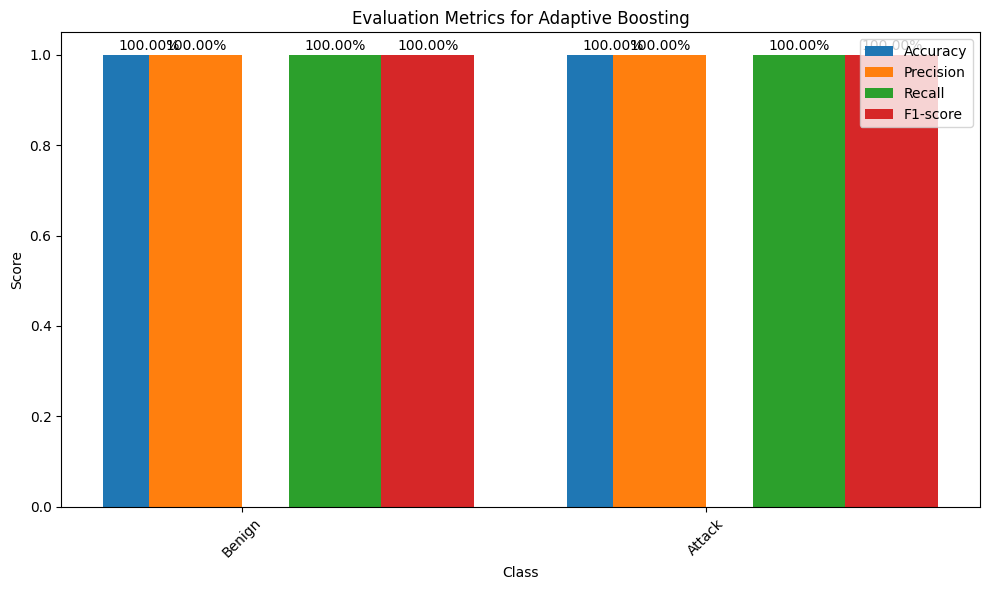

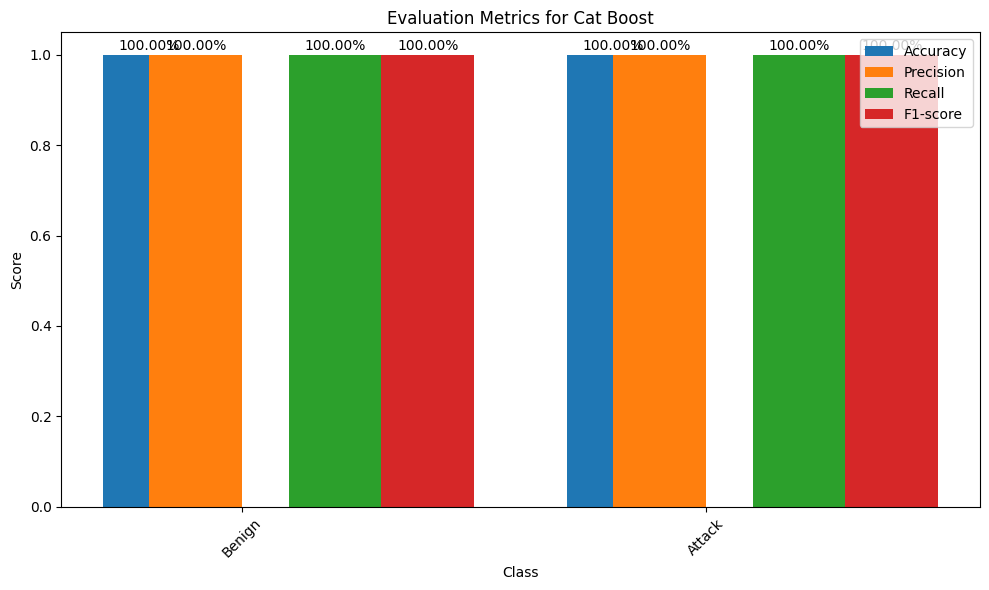

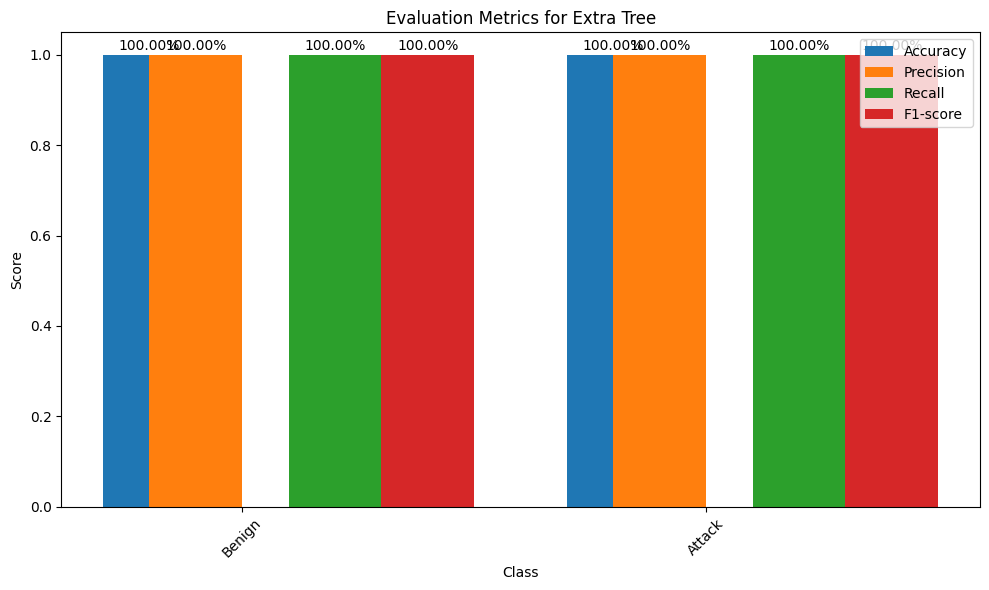

In [26]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

class_names = ['Benign', 'Attack']

for key, model in edgeiiot_models.items():
    report = classification_report(y_test, y_pred[key], target_names=class_names, digits=4, zero_division=1, output_dict=True)
    accuracy = report['accuracy']
    precision = [report[label]['precision'] for label in class_names]
    recall = [report[label]['recall'] for label in class_names]
    f1_score = [report[label]['f1-score'] for label in class_names]

    # Plot bar plots for precision, recall, and F1-score
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(class_names))
    bar_width = 0.2

    accuracy_bar = ax.bar(index, accuracy, bar_width, label='Accuracy')
    precision_bar = ax.bar(index + bar_width/2, precision, bar_width, label='Precision')  # Adjusted position
    recall_bar = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
    f1_score_bar = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-score')


    # # Add percentage values on top of each bar
    for i, v in enumerate(accuracy_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    for i, v in enumerate(precision_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    for i, v in enumerate(recall_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    for i, v in enumerate(f1_score_bar):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.01, f'{v.get_height()*100:.2f}%', ha='center')

    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.set_title(f'Evaluation Metrics for {key}')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_names, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()


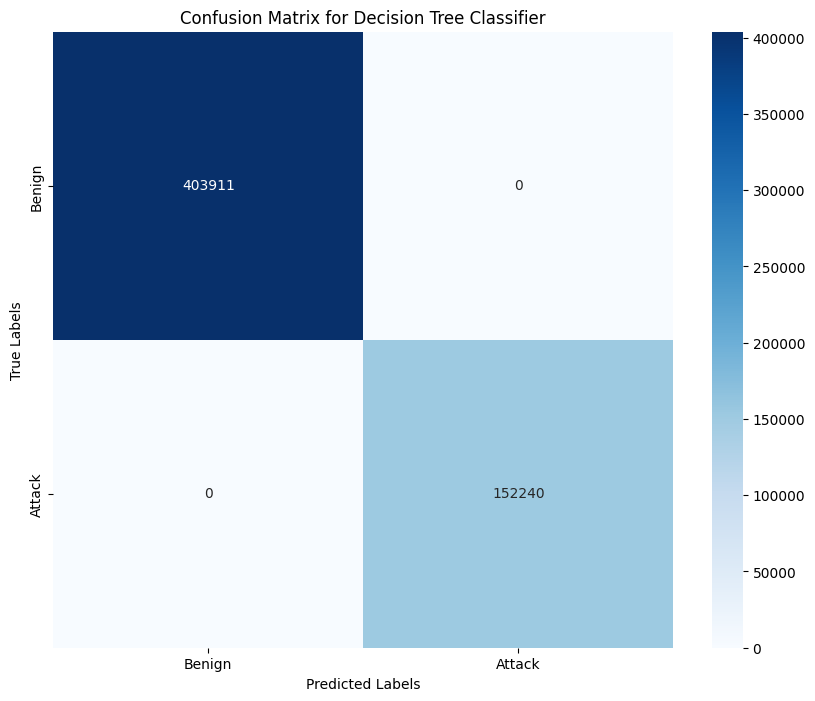

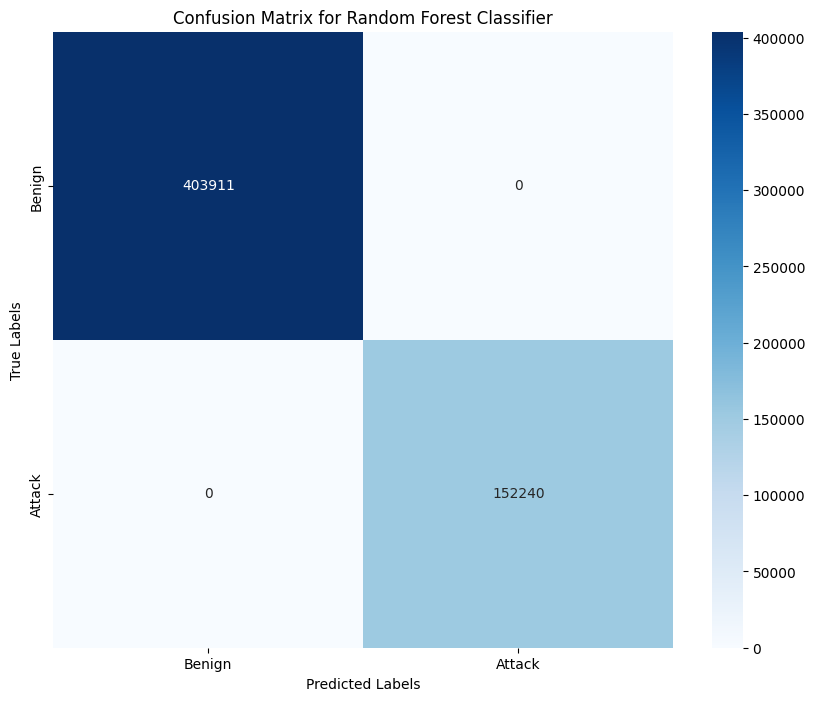

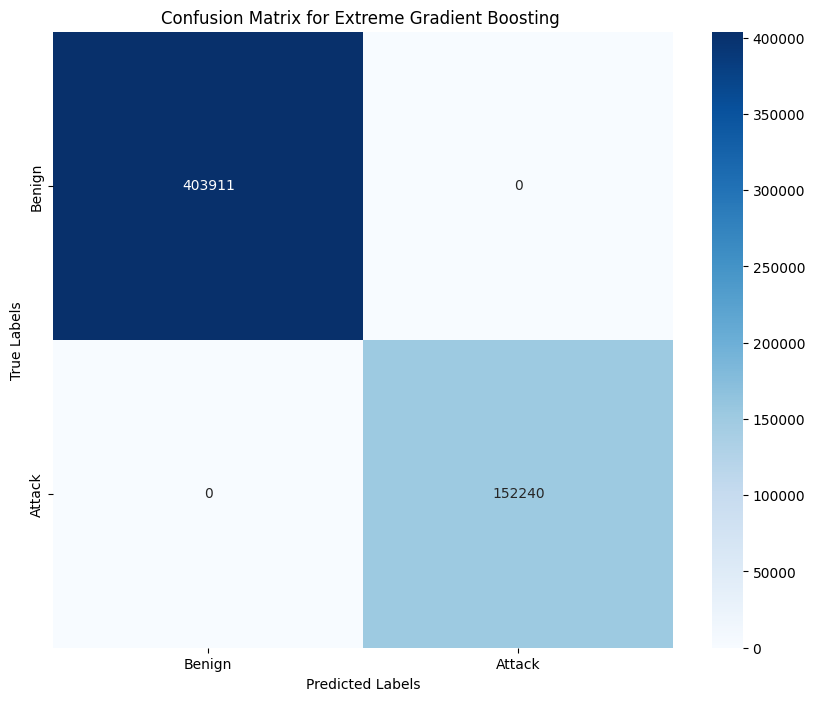

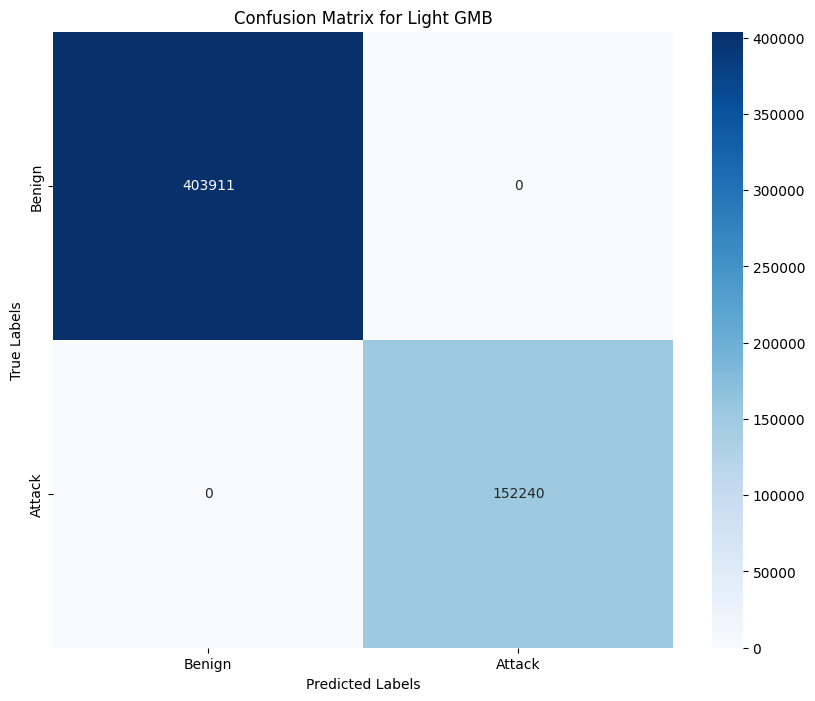

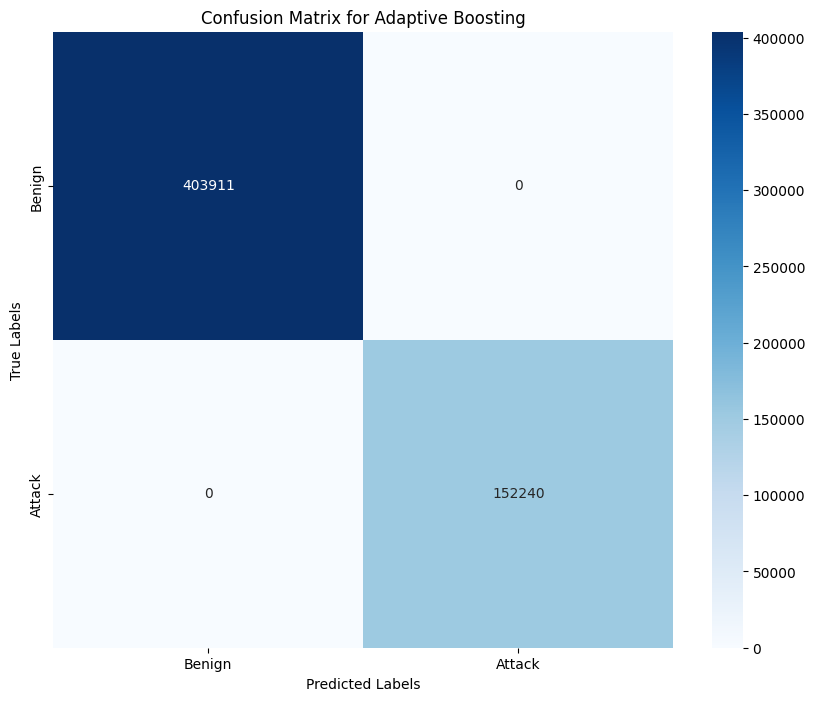

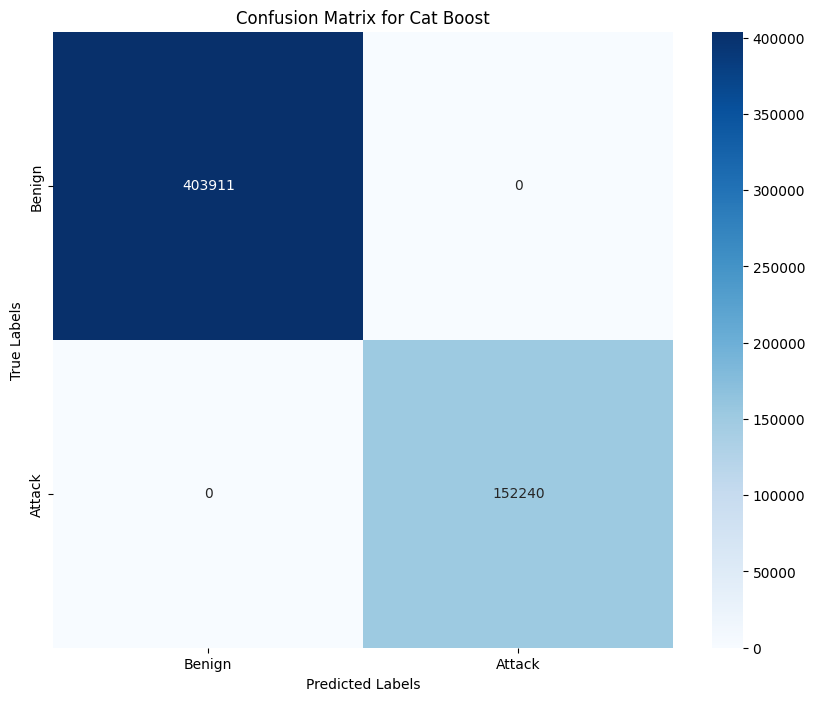

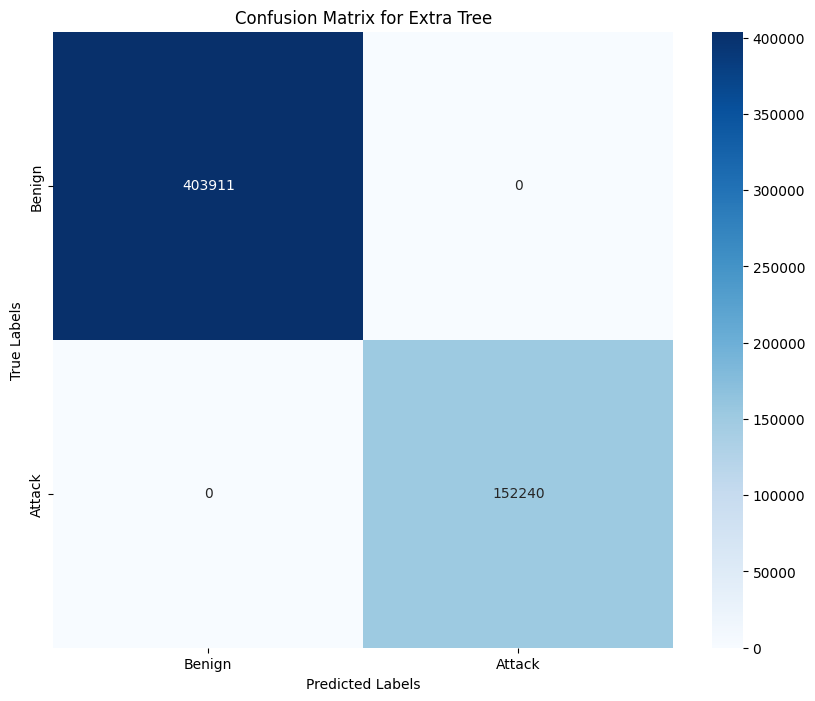

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['Benign', 'Attack']
for key, model in edgeiiot_models.items():
    # Get the predicted labels and true labels
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {key}')
    plt.show()